In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ComplexHeatmap")

Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.1 (2018-07-02)
Installing package(s) 'ComplexHeatmap'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Update old packages: 'backports', 'BiocManager', 'bookdown', 'callr',
  'circlize', 'clipr', 'curl', 'data.table', 'ddalpha', 'digest', 'doParallel',
  'e1071', 'earth', 'ellipsis', 'foreach', 'foreign', 'geometry', 'ggplot2',
  'GlobalOptions', 'haven', 'hexbin', 'hms', 'htmltools', 'htmlwidgets',
  'httpuv', 'httr', 'igraph', 'iterators', 'kernlab', 'KernSmooth', 'knitr',
  'lambda.r', 'later', 'lava', 'lpSolve', 'markdown', 'Matrix', 'matrixStats',
  'mgcv', 'modelr', 'nlme', 'openssl', 'pkgconfig', 'plotmo', 'pls', 'prodlim',
  'promises', 'purrr', 'R6', 'Rcpp', 'RcppAnnoy', 'RcppArmadillo', 'RcppEigen',
  'recipes', 'reticulate', 'Rhdf5lib', 'rlang', 'rmarkdown', 'RSpectra',
  'RSQLite', 'rvest', 'scales', 'selectr', 'shiny', 'survival', 'sys',
  'testthat', 'tidyr', 'tidyverse', 'tinytex', 'TTR', '

In [2]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
# suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
# suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))
suppressWarnings(suppressPackageStartupMessages(library(colorspace)))

In [3]:
## load full dataset (~ 11k genes, ~40k cells)
## after QC

In [4]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [5]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC

In [74]:
sce_10x_samples <- sce[,sce$day == "day0" & 
        sce$experiment %in% c("expt_31","expt_40","expt_41","expt_43","expt_44")]

In [77]:
ncol(sce_10x_samples)

[1] 2206

In [76]:
mean(table(sce_10x_samples$donor_short_id,sce_10x_samples$experiment)[table(sce_10x_samples$donor_short_id,sce_10x_samples$experiment)>0])

[1] 76.06897

In [6]:
unique(sce$donor_long_id)

[1] "HPSI0114i-joxm_1" "HPSI0314i-fafq_1" "HPSI1013i-wuye_2"
  [4] "HPSI0114i-iisa_3" "HPSI0114i-lexy_1" "HPSI1013i-hiaf_2"
  [7] "HPSI1013i-wopl_1" "HPSI1013i-sebz_1" "HPSI1113i-hayt_1"
 [10] "HPSI1013i-garx_2" "HPSI0314i-sojd_3" "HPSI0114i-zapk_3"
 [13] "HPSI0214i-wibj_2" "HPSI1013i-jogf_2" "HPSI0214i-pelm_3"
 [16] "HPSI0114i-vass_1" "HPSI0214i-heth_1" "HPSI0614i-paab_4"
 [19] "HPSI1014i-toss_3" "HPSI1013i-sita_1" "HPSI0614i-zoio_2"
 [22] "HPSI0414i-oaqd_3" "HPSI0914i-kajh_3" "HPSI0714i-fasu_2"
 [25] "HPSI0414i-tout_1" "HPSI0714i-iudw_4" "HPSI0514i-tavh_2"
 [28] "HPSI0215i-fawm_2" "HPSI0614i-dixh_2" "HPSI0614i-koqx_1"
 [31] "HPSI0714i-oebj_1" "HPSI0414i-naju_1" "HPSI0314i-wigw_2"
 [34] "HPSI0714i-oojs_1" "HPSI0514i-pulk_1" "HPSI0514i-eoxi_6"
 [37] "HPSI0414i-seru_1" "HPSI1014i-qayj_3" "HPSI0614i-guyj_2"
 [40] "HPSI0414i-oikd_2" "HPSI0114i-iisa_1" "HPSI0414i-walu_1"
 [43] "HPSI1014i-babz_3" "HPSI1014i-quls_2" "HPSI0514i-sohd_3"
 [46] "HPSI0514i-letw_1" "HPSI0215i-oilg_3" "HPSI0514i-rutc_2"
 [49] "HPSI0115i-vazt_1" "HPSI1014i-sehl_6" "HPSI0614i-oicx_6"
 [52] "HPSI0914i-suop_5" "HPSI1113i-wahn_1" "HPSI0715i-aowh_2"
 [55] "HPSI0314i-cuhk_2" "HPSI0613i-hegp_3" "HPSI0713i-cicb_2"
 [58] "HPSI0614i-lepk_1" "HPSI0713i-veku_2" "HPSI0613i-ueah_1"
 [61] "HPSI0514i-puie_5" "HPSI0913i-lise_3" "HPSI0115i-qoog_4"
 [64] "HPSI0214i-eiwy_1" "HPSI0514i-uenn_3" "HPSI0914i-iezw_2"
 [67] "HPSI0114i-kolf_2" "HPSI0914i-zerv_8" "HPSI0114i-wegi_1"
 [70] "HPSI1213i-tolg_6" "HPSI0214i-rayr_1" "HPSI0314i-qaqx_1"
 [73] "HPSI1013i-yemz_1" "HPSI0214i-kucg_2" "HPSI0114i-bezi_1"
 [76] "HPSI1014i-nosn_6" "HPSI1014i-kefb_1" "HPSI0414i-xojn_3"
 [79] "HPSI0215i-yoch_6" "HPSI0114i-eipl_1" "HPSI0314i-hoik_1"
 [82] "HPSI1213i-pahc_4" "HPSI0214i-giju_2" "HPSI0514i-vuna_3"
 [85] "HPSI0514i-qihv_1" "HPSI1113i-bima_1" "HPSI0514i-fiaj_3"
 [88] "HPSI0115i-zihe_1" "HPSI1014i-eesb_1" "HPSI1013i-kuxp_1"
 [91] "HPSI0514i-yelp_3" "HPSI0614i-qunz_3" "HPSI0115i-aoxv_3"
 [94] "HPSI0115i-melw_2" "HPSI1014i-juuy_2" "HPSI0714i-pipw_5"
 [97] "HPSI0914i-jejf_2" "HPSI0614i-uilk_3" "HPSI0914i-qehq_3"
[100] "HPSI0514i-toco_5" "HPSI1113i-hajc_1" "HPSI0514i-kuco_1"
[103] "HPSI0115i-hecn_3" "HPSI0614i-liqa_1" "HPSI0514i-tert_1"
[106] "HPSI0614i-ciwj_2" "HPSI0214i-poih_4" "HPSI0115i-iiyk_4"
[109] "HPSI0914i-laey_4" "HPSI0614i-miaj_6" "HPSI1014i-vils_1"
[112] "HPSI0514i-naah_2" "HPSI0715i-meue_4" "HPSI0714i-keui_1"
[115] "HPSI0513i-oibg_1" "HPSI0813i-guss_1" "HPSI0414i-mita_2"
[118] "HPSI0713i-nocf_2" "HPSI0214i-datg_2" "HPSI1113i-qorq_2"
[121] "HPSI0214i-feec_2" "HPSI0413i-nudd_1" "HPSI0814i-bokz_5"
[124] "HPSI1013i-zagm_1" "HPSI0513i-fejf_2" "HPSI0714i-nufh_3"

In [7]:
# sce_test = sce[,sample(ncol(sce), 1000)]

In [8]:
# sce_test = sce[sample(nrow(sce), 200),]

In [9]:
# saveRDS(sce_test,"/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts_test200genes.rds")

In [ ]:
## HVGs (highly variable genes)
library(scran)
sce = normalize(sce)
design = model.matrix(~ experiment, data = colData(sce))
alt.fit = trendVar(sce, design = design, use.spikes = FALSE)
alt.decomp = decomposeVar(sce, alt.fit)

Warning message in .get_all_sf_sets(object):
“spike-in set 'ERCC' should have its own size factors”

In [ ]:
top.100hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:100]
top.200hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:200]
top.500hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:500]
top.1000hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:1000]
top.2000hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:2000]

In [ ]:
rowData(sce)$is_intop100hvg <- (rownames(sce) %in% top.100hvgs)
rowData(sce)$is_intop200hvg <- (rownames(sce) %in% top.200hvgs)
rowData(sce)$is_intop500hvg <- (rownames(sce) %in% top.500hvgs)
rowData(sce)$is_intop1000hvg <- (rownames(sce) %in% top.1000hvgs)
rowData(sce)$is_intop2000hvg <- (rownames(sce) %in% top.2000hvgs)

In [ ]:
hvgs <- rownames(alt.decomp[alt.decomp$FDR < 0.01,])
rowData(sce)$is_hvg <- (rownames(sce) %in% hvgs)

In [ ]:
length(hvgs)

Warning message:
“`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session.”`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


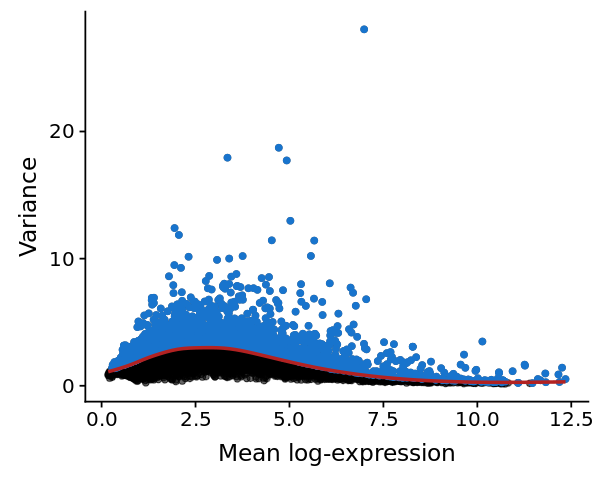

In [15]:
options(repr.plot.width = 5, repr.plot.height = 4)
vardecomp <-  data_frame(mean = alt.decomp$mean, total = alt.decomp$total,
           tech = alt.decomp$tech, bio = alt.decomp$bio)
ggplot(vardecomp, aes(x = mean, y = total)) +
    geom_point(alpha = 0.6) +
    geom_point(aes(x = mean, y = total), colour = "dodgerblue3",
               data = dplyr::filter(vardecomp, bio >= 0.1 * tech)) +
    geom_smooth(aes(x = mean, y = tech), colour = "firebrick") +
    ylab("Variance") + xlab("Mean log-expression")

In [ ]:
# pca.hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_hvg,])))$x
# pca.100hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_intop100hvg,])))$x
# pca.200hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_intop200hvg,])))$x
pca.500hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_intop500hvg,])))$x
# pca.1000hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_intop1000hvg,])))$x
# pca.2000hvgs= prcomp(t(logcounts(sce[rowData(sce)$is_intop2000hvg,])))$x

In [ ]:
# sce$PC1_top100hvgs = pca.100hvgs[,1]
# sce$PC1_top200hvgs = pca.200hvgs[,1]
sce$PC1_top500hvgs = pca.500hvgs[,1]
# sce$PC1_top1000hvgs = pca.1000hvgs[,1]
# sce$PC1_top2000hvgs = pca.2000hvgs[,1]

In [ ]:
############# define pseudotime #################

In [ ]:
# scale pseudotime (PC1, top 500hvgs) between 0 and 1
s = sce$PC1_top500hvgs
p1 = data.frame(pseudotime = s, day = sce$day)
head(p1)

In [20]:
############# define stages (inferred from pseudotime) #################

In [21]:
# some cells will not be assigned to any stage
sce$stage = "not assigned"

In [22]:
# just assign all day0 cells to ips
sce[,sce$day == "day0"]$stage = "ips"
# still based on not scale PC1, since those are the criteria used for eQTLs
sce[,sce$PC1_top500hvgs  > -23 & sce$PC1_top500hvgs < 4 & sce$day %in% c("day1","day2")]$stage = "mesendo"
sce[,sce$PC1_top500hvgs  > 22 & sce$day %in% c("day2","day3")]$stage = "defendo"

In [23]:
# sce_hvg = sce[rowData(sce)$is_intop500hvg,]
# sce_hvg = sce # use all genes to begin with
sce_hvg = sce[rowData(sce)$is_hvg,] # use all genes to begin with
sce_hvg = sce_hvg[,order(sce$PC1_top500hvgs)] # order by pseudotime
pheno = logcounts(sce_hvg)
pheno[1:5,1:10]

25476_4#161 24842_6#140 25476_4#261 25619_7#213
ENSG00000001626_CFTR   0.000000    0.000000    3.54343903  0.000000   
ENSG00000001631_KRIT1  3.881098    4.968258    0.02938662  2.019067   
ENSG00000002330_BAD    5.635139    6.035284    0.00000000  5.818258   
ENSG00000002586_CD99   4.689640    4.748486    4.67782549  5.490188   
ENSG00000002822_MAD1L1 3.327948    1.456564    2.17822331  4.118308   
                       25619_7#290 24475_3#217 25476_4#375 25476_4#363
ENSG00000001626_CFTR   0.000000    0.000000    0.000000    0.000000   
ENSG00000001631_KRIT1  0.000000    1.624508    4.054391    2.964503   
ENSG00000002330_BAD    6.696320    7.254389    3.061580    5.743200   
ENSG00000002586_CD99   5.626717    5.459356    4.236858    5.874729   
ENSG00000002822_MAD1L1 0.000000    2.495555    3.789074    4.460200   
                       25475_7#166 25476_4#348
ENSG00000001626_CFTR   0.000000    0.000000   
ENSG00000001631_KRIT1  3.101980    3.580990   
ENSG00000002330_BAD    6.851853    5.810500   
ENSG00000002586_CD99   2.467503    4.981735   
ENSG00000002822_MAD1L1 2.544673    4.500194

In [24]:
##### find genes differentially expressed from day to day

In [25]:
# define matrix, counts
mat = as.data.frame(cbind(sce_hvg$day, t(logcounts(sce_hvg))))
colnames(mat)[1] <- "day"
# design matrix, day
design <- model.matrix(~ 0 + day, data = mat)
colnames(design) = paste0("day",0:3)
design = cbind(1,design)
colnames(design)[1] = "Intercept"
dim(design)
head(design)

[1] 36044     5

Intercept day0 day1 day2 day3
25476_4#161 1         1    0    0    0   
24842_6#140 1         1    0    0    0   
25476_4#261 1         1    0    0    0   
25619_7#213 1         1    0    0    0   
25619_7#290 1         1    0    0    0   
24475_3#217 1         1    0    0    0

In [26]:
# only numeric
matnum <- matrix(as.numeric(unlist(mat[,-1])), nrow = nrow(mat), ncol = ncol(mat)-1)
rownames(matnum) <- rownames(mat)
colnames(matnum) <- colnames(mat)[-1]
dim(t(matnum))

[1]  4546 36044

In [27]:
# # top 50 genes DE between day0 and all other days
# mylm_0 = lmFit(t(matnum), design[,c("Intercept","day0")])
# fit_0 <- eBayes(mylm_0, trend = TRUE)
# df_fit_0 = as.data.frame(fit_0$coefficients)
# genes_day0 = rownames(head(df_fit_0[order(abs(df_fit_0$day0), decreasing = T),],50))
# # also day1
# mylm_1 = lmFit(t(matnum), design[,c("Intercept","day1")])
# fit_1 <- eBayes(mylm_1, trend = TRUE)
# df_fit_1 = as.data.frame(fit_1$coefficients)
# genes_day1 = rownames(head(df_fit_1[order(abs(df_fit_1$day1), decreasing = T),],50))
# # day2
# mylm_2 = lmFit(t(matnum), design[,c("Intercept","day2")])
# fit_2 <- eBayes(mylm_2, trend = TRUE)
# df_fit_2 = as.data.frame(fit_2$coefficients)
# genes_day2 = rownames(head(df_fit_2[order(abs(df_fit_2$day2), decreasing = T),],50))
# # day3
# mylm_3 = lmFit(t(matnum), design[,c("Intercept","day3")])
# fit_3 <- eBayes(mylm_3, trend = TRUE)
# df_fit_3 = as.data.frame(fit_3$coefficients)
# genes_day3 = rownames(head(df_fit_3[order(abs(df_fit_3$day3), decreasing = T),],50))
# # take the union of all those genes
# genes_days = c(genes_day0, genes_day1, genes_day2, genes_day3)

In [61]:
# top 50 genes DE between day0 and all other days
mylm_0 = lmFit(t(matnum), design[,c("Intercept","day0")])
fit_0 <- eBayes(mylm_0, trend = TRUE)
df_fit_0 = as.data.frame(fit_0$coefficients)
genes_day0 = rownames(head(df_fit_0[order(df_fit_0$day0, decreasing = T),],100))
# also day1
mylm_1 = lmFit(t(matnum), design[,c("Intercept","day1")])
fit_1 <- eBayes(mylm_1, trend = TRUE)
df_fit_1 = as.data.frame(fit_1$coefficients)
genes_day1 = rownames(head(df_fit_1[order(df_fit_1$day1, decreasing = T),],100))
# day2
mylm_2 = lmFit(t(matnum), design[,c("Intercept","day2")])
fit_2 <- eBayes(mylm_2, trend = TRUE)
df_fit_2 = as.data.frame(fit_2$coefficients)
genes_day2 = rownames(head(df_fit_2[order(df_fit_2$day2, decreasing = T),],100))
# day3
mylm_3 = lmFit(t(matnum), design[,c("Intercept","day3")])
fit_3 <- eBayes(mylm_3, trend = TRUE)
df_fit_3 = as.data.frame(fit_3$coefficients)
genes_day3 = rownames(head(df_fit_3[order(df_fit_3$day3, decreasing = T),],100))
# take the union of all those genes
genes_days = c(genes_day0, genes_day1, genes_day2, genes_day3)

In [62]:
length(unique(genes_days))

[1] 341

In [40]:
write.table(unique(genes_days), "/hps/nobackup/stegle/users/acuomo/all_scripts/DE_genes_between_days_top1000.tsv", quote = F, col.names = F, row.names = F)

In [36]:
write.table(unique(genes_days), "/hps/nobackup/stegle/users/acuomo/all_scripts/DE_genes_between_days_top300.tsv", quote = F, col.names = F, row.names = F)

In [63]:
write.table(unique(genes_days), "/hps/nobackup/stegle/users/acuomo/all_scripts/DE_genes_between_days_top100.tsv", quote = F, col.names = F, row.names = F)

In [32]:
write.table(unique(genes_days), "/hps/nobackup/stegle/users/acuomo/all_scripts/DE_genes_between_days_top50.tsv", quote = F, col.names = F, row.names = F)

In [64]:
df0 = as.data.frame(fit_0$p.value)
colnames(df0)[2] = "p_value"
df0$corr_p_value = p.adjust(df0$p_value, method = "bonferroni")
nrow(df0[df0$corr_p_value < 5e-8,])

[1] 3615

In [65]:
genes_day0 %in% genes_day1
genes_day0 %in% genes_day2
genes_day0 %in% genes_day3
genes_day1 %in% genes_day2
genes_day1 %in% genes_day3
genes_day2 %in% genes_day3
length(genes_day0[genes_day0 %in% genes_day1])
length(genes_day0[genes_day0 %in% genes_day2])
length(genes_day0[genes_day0 %in% genes_day3])
length(genes_day1[genes_day1 %in% genes_day2])
length(genes_day1[genes_day1 %in% genes_day3])
length(genes_day2[genes_day2 %in% genes_day3])

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE
 [37]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [73]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

[1] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE  TRUE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
 [13]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [37] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [97]  TRUE  TRUE  TRUE  TRUE

[1] 14

[1] 0

[1] 0

[1] 4

[1] 0

[1] 41

In [66]:
a11 = length(genes_day0)
a12 = length(genes_day0[genes_day0 %in% genes_day1])
a13 = length(genes_day0[genes_day0 %in% genes_day2])
a14 = length(genes_day0[genes_day0 %in% genes_day3])
a22 = length(genes_day1)
a23 = length(genes_day1[genes_day1 %in% genes_day2])
a24 = length(genes_day1[genes_day1 %in% genes_day3])
a33 = length(genes_day2)
a34 = length(genes_day2[genes_day2 %in% genes_day3])
a44 = length(genes_day3)

In [67]:
mat = matrix(rbind(c(a11, a12, a13, a14),
                   c(a12, a22, a23, a24),
                   c(a13, a23, a33, a34),
                   c(a14, a24, a34, a44)), ncol = 4)
mat

[,1] [,2] [,3] [,4]
[1,] 100   14    0    0 
[2,]  14  100    4    0 
[3,]   0    4  100   41 
[4,]   0    0   41  100

In [68]:
rownames(mat) = paste0("day",0:3)
colnames(mat) = paste0("day",0:3)

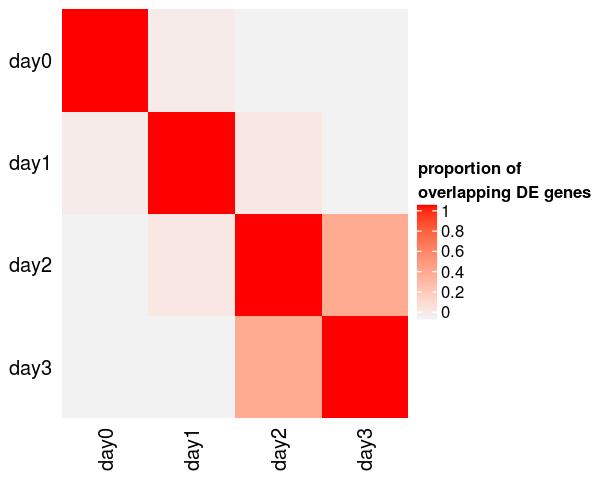

In [31]:
# top 50 per day
options(repr.plot.width = 5, repr.plot.height = 4)
Heatmap(mat/50, cluster_columns = FALSE, cluster_rows = FALSE, name = "proportion of \noverlapping DE genes",
       col = colorRamp2(c(0, 1), c("gray95", "red")), row_names_side = "left")

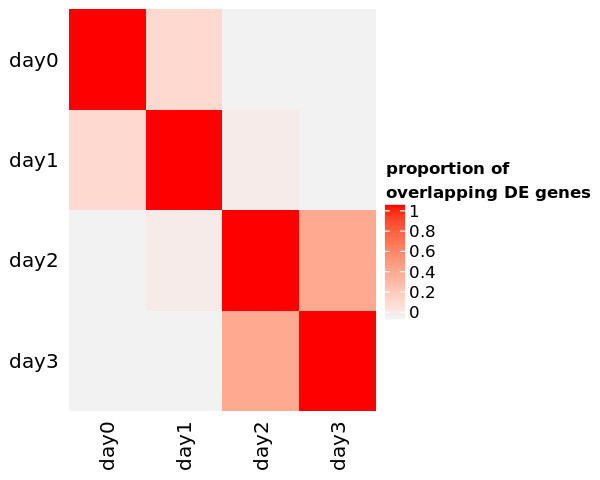

In [69]:
# top 100 per day
options(repr.plot.width = 5, repr.plot.height = 4)
Heatmap(mat/100, cluster_columns = FALSE, cluster_rows = FALSE, name = "proportion of \noverlapping DE genes",
       col = colorRamp2(c(0, 1), c("gray95", "red")), row_names_side = "left")

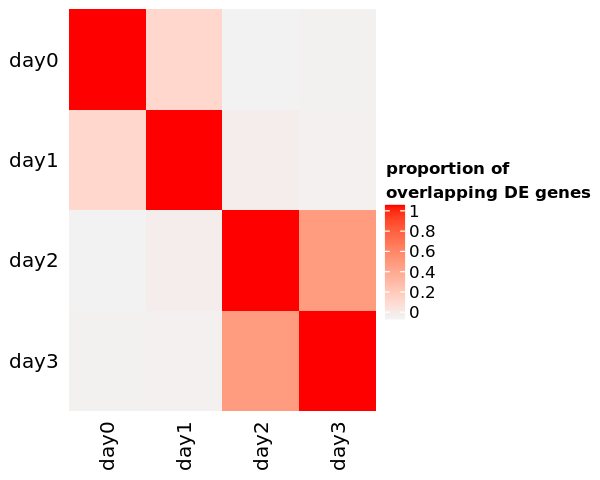

In [60]:
# top 300 per day
options(repr.plot.width = 5, repr.plot.height = 4)
Heatmap(mat/300, cluster_columns = FALSE, cluster_rows = FALSE, name = "proportion of \noverlapping DE genes",
       col = colorRamp2(c(0, 1), c("gray95", "red")), row_names_side = "left")

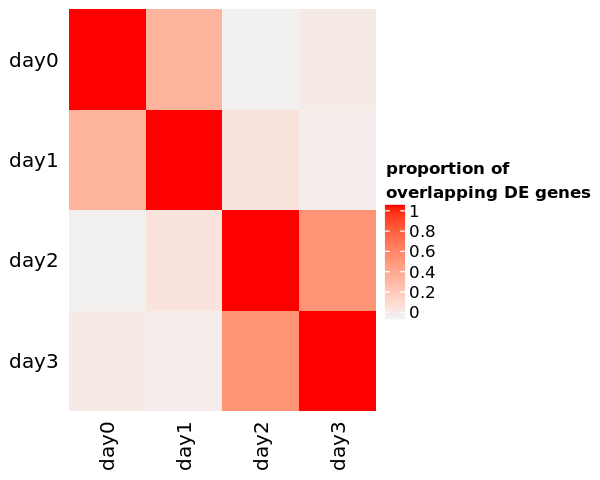

In [53]:
# top 1,000 per day
options(repr.plot.width = 5, repr.plot.height = 4)
Heatmap(mat/1000, cluster_columns = FALSE, cluster_rows = FALSE, name = "proportion of \noverlapping DE genes",
       col = colorRamp2(c(0, 1), c("gray95", "red")), row_names_side = "left")

In [32]:
# select relevant genes to show
mat = pheno[rownames(pheno) %in% unique(genes_days),]

In [33]:
# scale matrix (each row)
mat_scaled = t(apply(mat, 1, scale))

In [34]:
## genes to annotate
genes_sel = c('NANOG','T','GATA6','CXCR4','EOMES','NODAL','SOX17','LHX1','CER1','MIXL1','ID2','UBE2L6',
             'ADM','MT1X','IDO1','RAMP2','POU5F1')
genes_sel = c('NANOG','T','GATA6')
subset = which(gsub(".*_","",rownames(mat)) %in% genes_sel)
labels = gsub(".*_","",rownames(mat)[subset])

In [49]:
## annotations
ha_top = HeatmapAnnotation(df = data.frame(stage = sce_hvg$stage), 
    col = list(stage = c("ips" = "cornflowerblue", "mesendo" = "forestgreen", "defendo" = "coral",
                        "not assigned" = "grey"))) # col anno3

ha_bottom = HeatmapAnnotation(df = data.frame(pseudotime = range01(sce_hvg$PC1_top500hvgs), # annotation 1
                                              day = sce_hvg$day, # annotation 2
                                             tra160 = colData(sce_hvg)$mean_tra160_norm_sorted>0,
                                             cxcr4 = colData(sce_hvg)$mean_cxcr4_norm_sorted>0,
                    cxcr4_tra160 = (colData(sce_hvg)$mean_cxcr4_norm_sorted)>0 & (colData(sce_hvg)$mean_tra160_norm_sorted)<0),
    gap = unit(c(1.5,2,0.5,0.5), "mm"),
    col = list(pseudotime = colorRamp2(c(0,1), c("white", "darkblue")), # col anno1
               day = c("day0" =  "#344d90", "day1" = "#5cc5ef", "day2" = "#ffb745", "day3" = "#e7552c"), # col anno2
               tra160 = c("TRUE" = "purple", "FALSE" = "pink"),
               cxcr4 = c("TRUE" = "purple", "FALSE" = "pink"),
              cxcr4_tra160 = c("TRUE" = "purple", "FALSE" = "pink")))

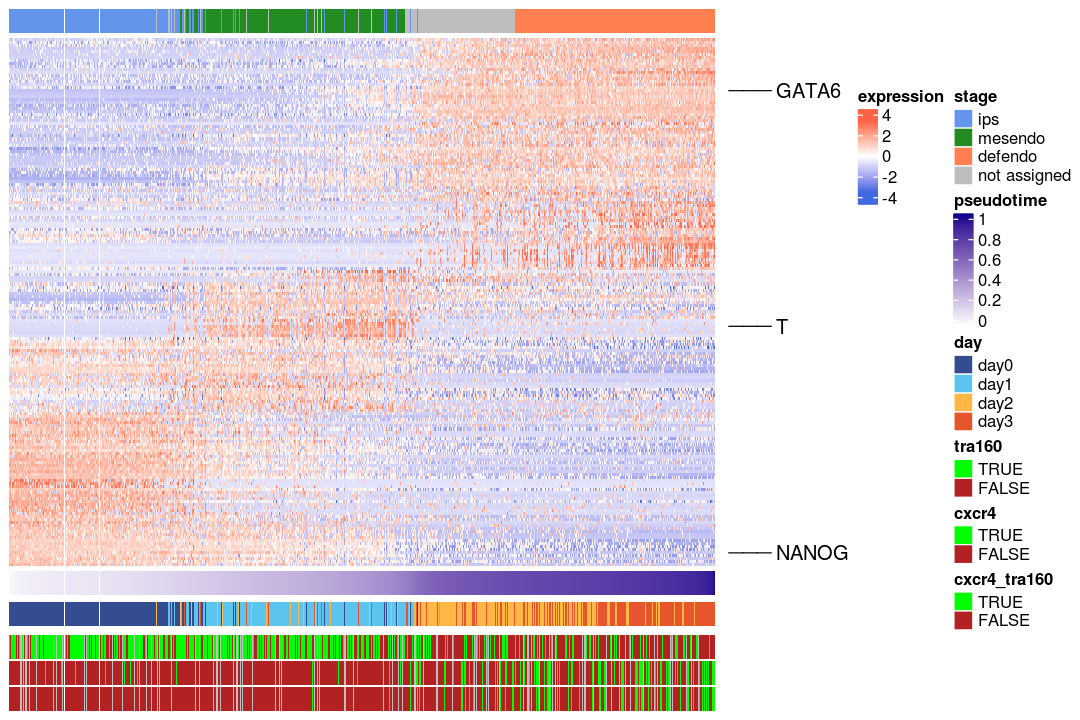

In [50]:
options(repr.plot.width = 9, repr.plot.height = 6)
Heatmap(mat_scaled,  show_column_names = FALSE, show_row_names = FALSE, show_row_dend = FALSE,
        name = "expression", 
        col = colorRamp2(c(-3, 0, 3), c("royalblue", "white", "tomato")),
        top_annotation = ha_top,
        bottom_annotation = ha_bottom,
        cluster_columns = FALSE, clustering_distance_rows = "spearman") + 
rowAnnotation(link = row_anno_link(at = subset, labels = labels),
  width = unit(1, "cm") + max_text_width(labels))

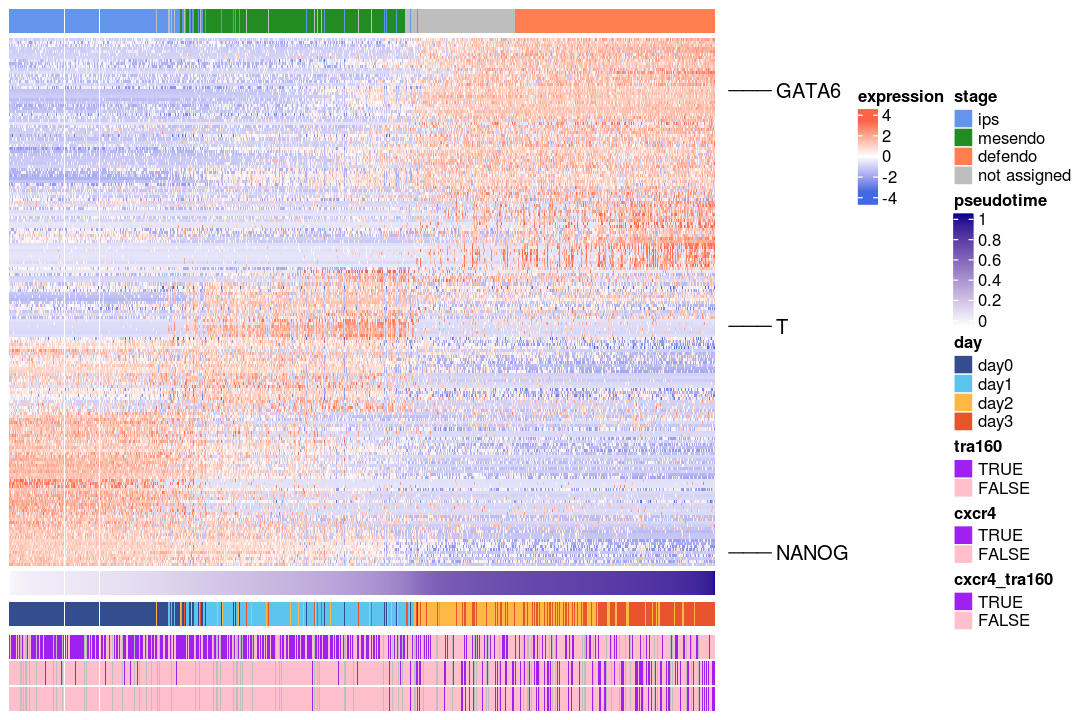

In [46]:
options(repr.plot.width = 9, repr.plot.height = 6)
Heatmap(mat_scaled,  show_column_names = FALSE, show_row_names = FALSE, show_row_dend = FALSE,
        name = "expression", 
        col = colorRamp2(c(-3, 0, 3), c("royalblue", "white", "tomato")),
        top_annotation = ha_top,
        bottom_annotation = ha_bottom,
        cluster_columns = FALSE, clustering_distance_rows = "spearman") + 
rowAnnotation(link = row_anno_link(at = subset, labels = labels),
  width = unit(1, "cm") + max_text_width(labels))

In [112]:
# wegi_1 and kucg_2
unique(sce_hvg$donor_short_id)[order(unique(sce_hvg$donor_short_id))]

[1] "aowh_2" "aoxv_3" "babz_3" "bezi_1" "bima_1" "bokz_5" "cicb_2" "ciwj_2"
  [9] "cuhk_2" "datg_2" "dixh_2" "eesb_1" "eipl_1" "eiwy_1" "eoxi_6" "fafq_1"
 [17] "fasu_2" "fawm_2" "feec_2" "fejf_2" "fiaj_3" "garx_2" "giju_2" "guss_1"
 [25] "guyj_2" "hajc_1" "hayt_1" "hecn_3" "hegp_3" "heth_1" "hiaf_2" "hoik_1"
 [33] "iezw_2" "iisa_1" "iisa_3" "iiyk_4" "iudw_4" "jejf_2" "jogf_2" "joxm_1"
 [41] "juuy_2" "kajh_3" "kefb_1" "keui_1" "kolf_2" "koqx_1" "kucg_2" "kuco_1"
 [49] "kuxp_1" "laey_4" "lepk_1" "letw_1" "lexy_1" "liqa_1" "lise_3" "melw_2"
 [57] "meue_4" "miaj_6" "mita_2" "naah_2" "naju_1" "nocf_2" "nosn_6" "nudd_1"
 [65] "nufh_3" "oaqd_3" "oebj_1" "oibg_1" "oicx_6" "oikd_2" "oilg_3" "oojs_1"
 [73] "paab_4" "pahc_4" "pelm_3" "pipw_5" "poih_4" "puie_5" "pulk_1" "qaqx_1"
 [81] "qayj_3" "qehq_3" "qihv_1" "qoog_4" "qorq_2" "quls_2" "qunz_3" "rayr_1"
 [89] "rutc_2" "sebz_1" "sehl_6" "seru_1" "sita_1" "sohd_3" "sojd_3" "suop_5"
 [97] "tavh_2" "tert_1" "toco_5" "tolg_6" "toss_3" "tout_1" "ueah_1" "uenn_3"
[105] "uilk_3" "vass_1" "vazt_1" "veku_2" "vils_1" "vuna_3" "wahn_1" "walu_1"
[113] "wegi_1" "wibj_2" "wigw_2" "wopl_1" "wuye_2" "xojn_3" "yelp_3" "yemz_1"
[121] "yoch_6" "zagm_1" "zapk_3" "zerv_8" "zihe_1" "zoio_2"

In [72]:
ha = HeatmapAnnotation(df = data.frame(pseudotime = range01(sce_hvg$PC1_top500hvgs), 
                                             tra160 = colData(sce_hvg)$mean_tra160_norm_sorted>0,
                                             cxcr4 = colData(sce_hvg)$mean_cxcr4_norm_sorted>0,
                    cxcr4_tra160 = (colData(sce_hvg)$mean_cxcr4_norm_sorted)>0 & (colData(sce_hvg)$mean_tra160_norm_sorted)<0,
                                      day = sce_hvg$day),
    gap = unit(c(1.5,2,0.5,0.5), "mm"),
    col = list(pseudotime = colorRamp2(c(0,1), c("white", "darkblue")), 
               tra160 = c("TRUE" = "indianred3", "FALSE" = "mistyrose"),
               cxcr4 = c("TRUE" = "indianred3", "FALSE" = "mistyrose"),
              cxcr4_tra160 = c("TRUE" = "indianred3", "FALSE" = "mistyrose"),
              day = c("day0" =  "#344d90", "day1" = "#5cc5ef", "day2" = "#ffb745", "day3" = "#e7552c")))

In [74]:
df = data.frame(pseudotime = range01(sce_hvg$PC1_top500hvgs), 
                                             tra160 = colData(sce_hvg)$mean_tra160_norm_sorted>0,
                                             cxcr4 = colData(sce_hvg)$mean_cxcr4_norm_sorted>0,
                    cxcr4_tra160 = (colData(sce_hvg)$mean_cxcr4_norm_sorted)>0 & (colData(sce_hvg)$mean_tra160_norm_sorted)<0,
                                      day = sce_hvg$day)

In [75]:
head(df)

pseudotime tra160 cxcr4 cxcr4_tra160 day 
25476_4#161 0.00000000 TRUE   FALSE FALSE        day0
24842_6#140 0.01309463 TRUE   FALSE FALSE        day0
25476_4#261 0.01368769 TRUE   FALSE FALSE        day0
25619_7#213 0.01375166 TRUE   FALSE FALSE        day0
25619_7#290 0.01377206 TRUE   FALSE FALSE        day0
24475_3#217 0.01494795   NA      NA    NA        day0

In [83]:
df$tra160_binary[df$tra160 == "TRUE"] = 1
df$tra160_binary[df$tra160 == "FALSE"] = 0

In [88]:
df$cxcr4_binary[df$cxcr4 == "TRUE"] = 1
df$cxcr4_binary[df$cxcr4 == "FALSE"] = 0

In [108]:
df1 = df[,c("pseudotime","tra160_binary")]
colnames(df1)[2] = "positive"
df1$marker = "TRA-1-60 (+)"
df2 = df[,c("pseudotime","cxcr4_binary")]
colnames(df2)[2] = "positive"
df2$marker = "CXCR4 (+)"

`geom_smooth()` using method = 'gam'


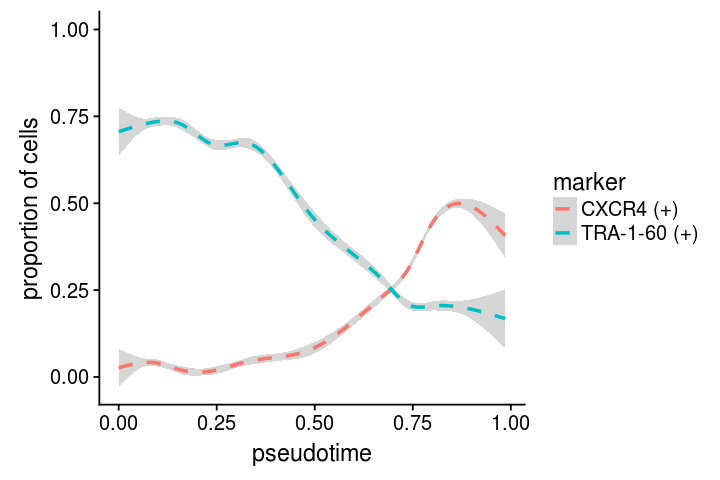

In [109]:
df3 = rbind(df1,df2)
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df3[!(is.na(df3$positive)),], aes(x = pseudotime, y = positive, colour = marker)) + 
    geom_point(alpha = 0) + stat_smooth(linetype = 2) + ylab("proportion of cells")

`geom_smooth()` using method = 'gam'


`geom_smooth()` using method = 'gam'


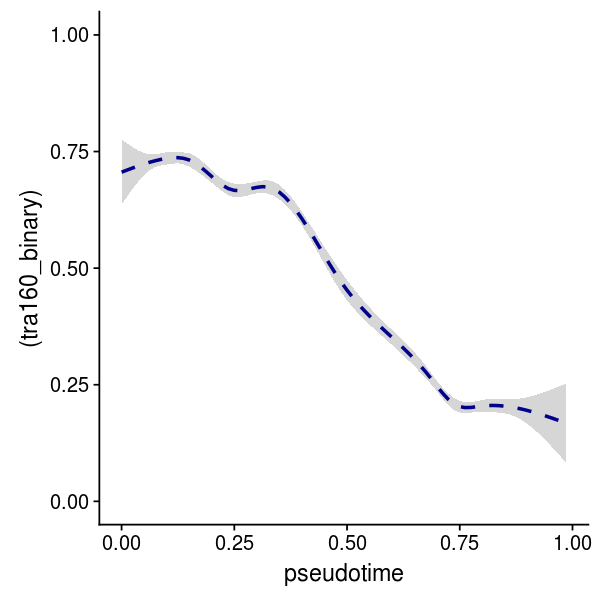

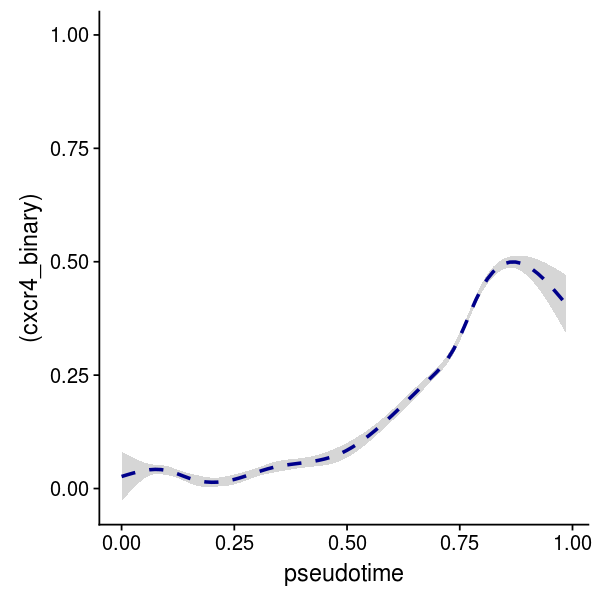

In [89]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df[!(is.na(df$tra160)),], aes(x = pseudotime, y = (tra160_binary))) + 
          geom_point(alpha = 0) + stat_smooth(colour = "darkblue", linetype = 2)
ggplot(df[!(is.na(df$cxcr4)),], aes(x = pseudotime, y = (cxcr4_binary))) + 
          geom_point(alpha = 0) + stat_smooth(colour = "darkblue", linetype = 2)

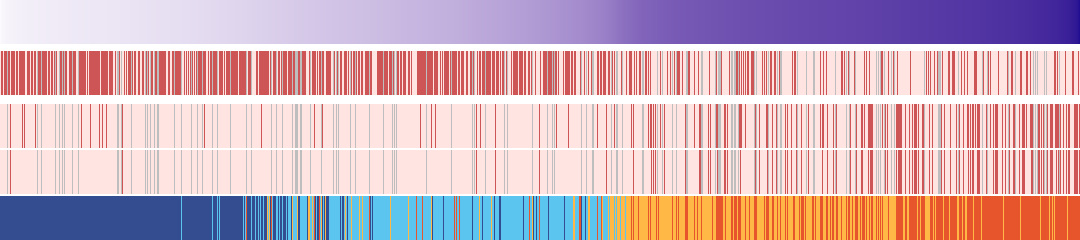

In [73]:
options(repr.plot.width = 9, repr.plot.height = 2)
draw(ha, 1:ncol(sce_hvg))

In [69]:
## annotations
ha_top = HeatmapAnnotation(df = data.frame(stage = sce_hvg$stage), 
    col = list(stage = c("ips" = "cornflowerblue", "mesendo" = "forestgreen", "defendo" = "coral",
                        "not assigned" = "grey"))) # col anno3

ha_bottom = HeatmapAnnotation(df = data.frame(pseudotime = range01(sce_hvg$PC1_top500hvgs), # annotation 1
                                              day = sce_hvg$day), # annotation 2
    gap = unit(1.5, "mm"),
    col = list(pseudotime = colorRamp2(c(0,1), c("white", "darkblue")), # col anno1
               day = c("day0" =  "#344d90", "day1" = "#5cc5ef", "day2" = "#ffb745", "day3" = "#e7552c"))) # col anno2

In [1]:
# options(repr.plot.width = 9, repr.plot.height = 6)
# Heatmap(mat_scaled,  show_column_names = FALSE, show_row_names = FALSE, show_row_dend = FALSE,
#         name = "expression", 
#         col = diverge_hcl(12, c = 100, l = c(50,90), power = 1),
#         top_annotation = ha_top,
#         bottom_annotation = ha_bottom,
#         cluster_columns = FALSE, clustering_distance_rows = "spearman") + 
# rowAnnotation(link = row_anno_link(at = subset, labels = labels),
#   width = unit(1, "cm") + max_text_width(labels))

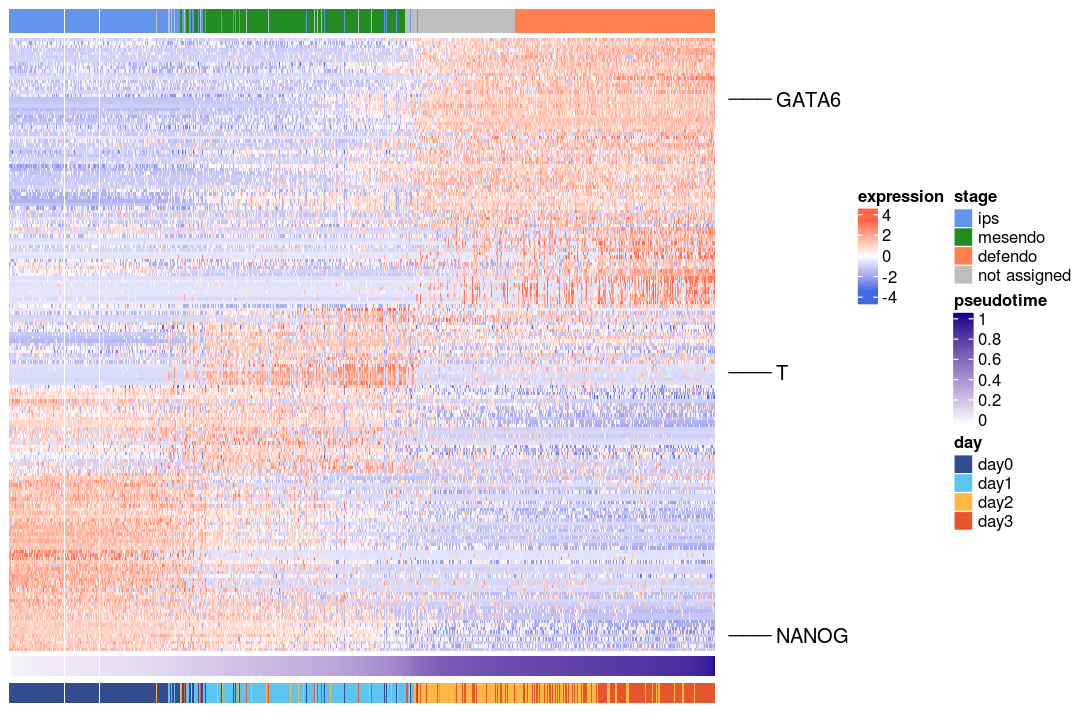

In [43]:
options(repr.plot.width = 9, repr.plot.height = 6)
Heatmap(mat_scaled,  show_column_names = FALSE, show_row_names = FALSE, show_row_dend = FALSE,
        name = "expression", 
        col = colorRamp2(c(-3, 0, 3), c("royalblue", "white", "tomato")),
        top_annotation = ha_top,
        bottom_annotation = ha_bottom,
        cluster_columns = FALSE, clustering_distance_rows = "spearman") + 
rowAnnotation(link = row_anno_link(at = subset, labels = labels),
  width = unit(1, "cm") + max_text_width(labels))

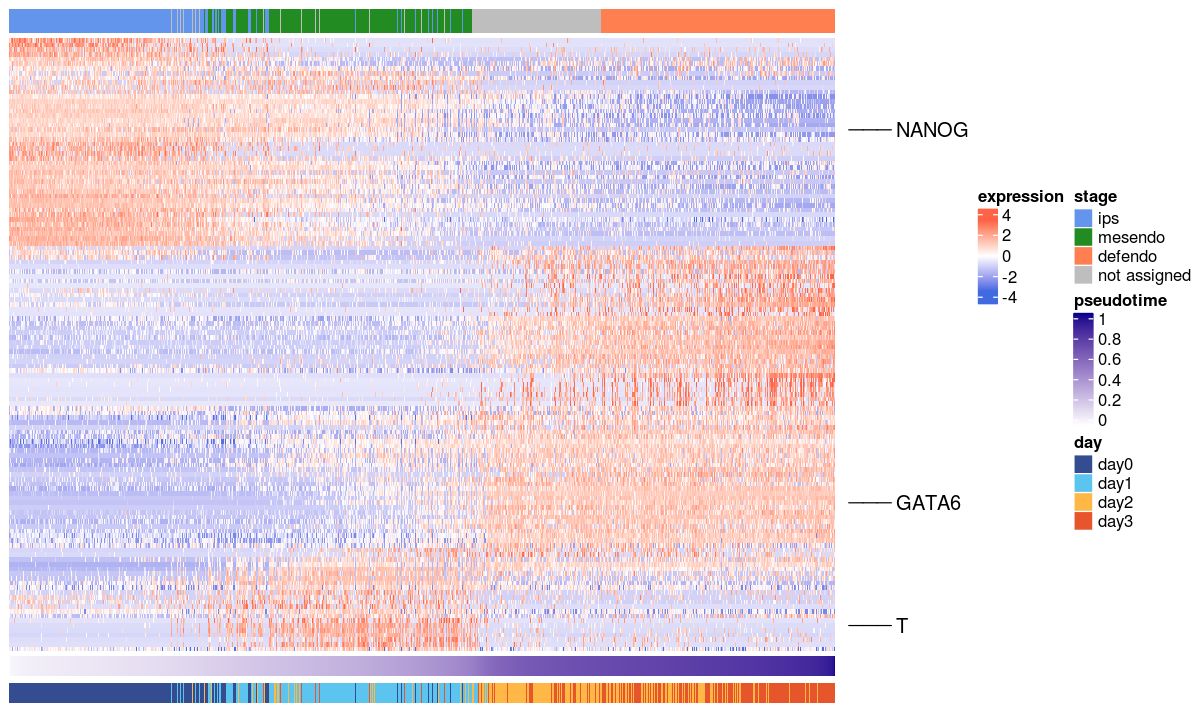

In [30]:
options(repr.plot.width = 10, repr.plot.height = 6)
Heatmap(mat_scaled,  show_column_names = FALSE, show_row_names = FALSE, show_row_dend = FALSE,
        name = "expression", 
        col = colorRamp2(c(-3, 0, 3), c("royalblue", "white", "tomato")),
        top_annotation = ha_top,
        bottom_annotation = ha_bottom,
        cluster_columns = FALSE) + 
rowAnnotation(link = row_anno_link(at = subset, labels = labels),
  width = unit(1, "cm") + max_text_width(labels))

In [44]:
svg("/hps/nobackup/stegle/users/acuomo/figures_sc_endodiff/heatmap_for1D.svg",width = 16,height = 12)
Heatmap(mat_scaled,  show_column_names = FALSE, show_row_names = FALSE, show_row_dend = FALSE,
        name = "expression", 
        col = colorRamp2(c(-3, 0, 3), c("royalblue", "white", "tomato")),
        top_annotation = ha_top,
        bottom_annotation = ha_bottom,
        cluster_columns = FALSE, clustering_distance_rows = "spearman") + 
rowAnnotation(link = row_anno_link(at = subset, labels = labels),
  width = unit(1, "cm") + max_text_width(labels))
dev.off()

png 
  2

In [45]:
pdf("/hps/nobackup/stegle/users/acuomo/figures_sc_endodiff/heatmap_for1D.pdf",width = 16,height = 12)
Heatmap(mat_scaled,  show_column_names = FALSE, show_row_names = FALSE, show_row_dend = FALSE,
        name = "expression", 
        col = colorRamp2(c(-3, 0, 3), c("royalblue", "white", "tomato")),
        top_annotation = ha_top,
        bottom_annotation = ha_bottom,
        cluster_columns = FALSE, clustering_distance_rows = "spearman") + 
rowAnnotation(link = row_anno_link(at = subset, labels = labels),
  width = unit(1, "cm") + max_text_width(labels))
dev.off()

png 
  2

In [50]:
jpeg("/hps/nobackup/stegle/users/acuomo/figures_sc_endodiff/heatmap_for1D.jpeg",width = 16,height = 12)
Heatmap(mat_scaled,  show_column_names = FALSE, show_row_names = FALSE, show_row_dend = FALSE,
        name = "expression", 
        col = colorRamp2(c(-3, 0, 3), c("royalblue", "white", "tomato")),
        top_annotation = ha_top,
        bottom_annotation = ha_bottom,
        cluster_columns = FALSE, clustering_distance_rows = "spearman") + 
rowAnnotation(link = row_anno_link(at = subset, labels = labels),
  width = unit(1, "cm") + max_text_width(labels))
dev.off()

ERROR while rich displaying an object: Error in .local(object, ...): Error in grid.Call(C_convert, x, as.integer(whatfrom), as.integer(whatto),  : 
  Viewport has zero dimension(s)


Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15.

png 
  2

In [ ]:
######################################################################################################################
######################################################################################################################
######################################################################################################################

In [ ]:
diff_genes_reduced = c("ENSG00000111704_NANOG", "ENSG00000164458_T", "ENSG00000163508_EOMES", "ENSG00000141448_GATA6")

In [ ]:
s = sce$PC1_top100hvgs
range01 <- function(x){(x-min(x))/(max(x)-min(x))}
df$pseudo = range01(s)
df = data.frame(cell = sce$cell_name, day = sce$day, expt = sce$experiment, donor = sce$donor) 
df$pseudo = range01(s)
head(df)

In [ ]:
plist = list()
for (i in 1:length(diff_genes_reduced)){
    gene = diff_genes_reduced[i]
    df$gene = logcounts(sce)[gene,]
    plist[[i]] = ggplot(df, aes(x = as.numeric(pseudo), y = as.numeric(gene), colour = as.factor(day))) + 
            geom_point(alpha = 0.2, pch = 20) 
}

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 3) 
plist = plist
for (j in seq(2, length(diff_genes_reduced), by = 2)){
    p1 = plist[[j-1]]
    p1 = p1 + ggtitle(gsub(".*_","",diff_genes_reduced[j-1])) + 
         xlab("pseudotime") + ylab("sc expression") + labs(colour = "day") + 
        scale_color_canva(palette = "Pool party") + geom_point(alpha = 0.15, pch = 20) +
        stat_smooth(colour = "darkblue", linetype = 2)+  
        theme(legend.position="none", panel.border = element_blank())
    p2 = plist[[j]]
    p2 = p2 + ggtitle(gsub(".*_","",diff_genes_reduced[j])) + 
        xlab("pseudotime") + ylab("sc expression") + labs(colour = "day") + 
        scale_color_canva(palette = "Pool party") + geom_point(alpha = 0.15, pch = 20) +
        stat_smooth(colour = "darkblue", linetype = 2) + 
        theme(legend.position="none", panel.border = element_blank())
    print(plot_grid(p1, p2, ncol = 2))
}

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


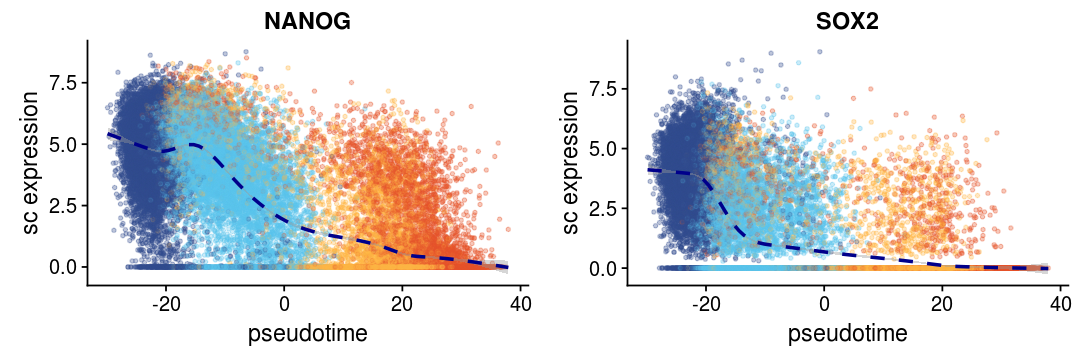

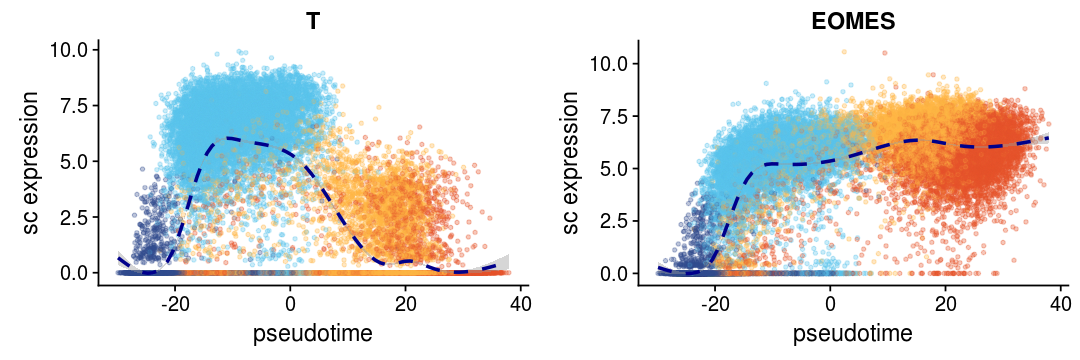

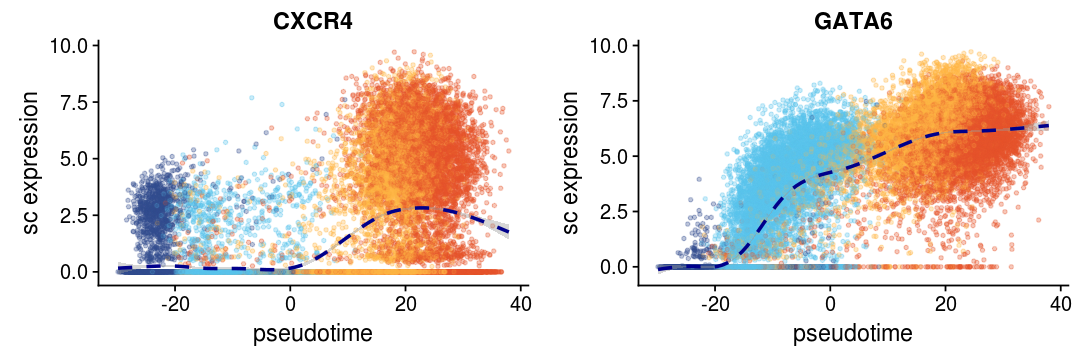

In [38]:
options(repr.plot.width = 9, repr.plot.height = 3) 
plist = plist1
for (j in seq(2, length(diff_genes_reduced), by = 2)){
    p1 = plist[[j-1]]
    p1 = p1 + ggtitle(gsub(".*_","",diff_genes_reduced[j-1])) + 
         xlab("pseudotime") + ylab("sc expression") + labs(colour = "day") + 
        scale_color_canva(palette = "Pool party") + geom_point(alpha = 0.15, pch = 20) +
        stat_smooth(colour = "darkblue", linetype = 2)+  
        theme(legend.position="none", panel.border = element_blank())
    p2 = plist[[j]]
    p2 = p2 + ggtitle(gsub(".*_","",diff_genes_reduced[j])) + 
        xlab("pseudotime") + ylab("sc expression") + labs(colour = "day") + 
        scale_color_canva(palette = "Pool party") + geom_point(alpha = 0.15, pch = 20) +
        stat_smooth(colour = "darkblue", linetype = 2) + 
        theme(legend.position="none", panel.border = element_blank())
    print(plot_grid(p1, p2, ncol = 2))
}

In [33]:
s = sce$PC1_top500hvgs
p1 = data.frame(pseudotime = range01(s), day = sce$day)
head(p1)

pseudotime day 
21843_1#10  0.3022399  day1
21843_1#100 0.5042794  day1
21843_1#101 0.4352490  day1
21843_1#102 0.2695033  day1
21843_1#103 0.3735655  day1
21843_1#105 0.4149124  day1

In [75]:
c(nrow(dplyr::filter(p1,  pseudotime < 0.25, day == "day0")),
  nrow(dplyr::filter(p1, pseudotime > 0.15 & pseudotime < 0.5, day %in% c("day1","day2"))),
  nrow(dplyr::filter(p1, pseudotime >  0.65, day %in% c("day2","day3"))))

[1]  8494  9944 11974

In [73]:
c(nrow(dplyr::filter(p1,  pseudotime < 0.25, day == "day0")),
  nrow(dplyr::filter(p1, pseudotime > 0.15 & pseudotime < 0.5, day %in% c("day1","day2"))),
  nrow(dplyr::filter(p1, pseudotime >  0.65, day %in% c("day2","day3"))))

[1]  8892  9877 13435

In [34]:
c(nrow(dplyr::filter(p1,  pseudotime < 0.25, day == "day0")),
  nrow(dplyr::filter(p1, pseudotime > 0.15 & pseudotime < 0.5, day %in% c("day1","day2"))),
  nrow(dplyr::filter(p1, pseudotime >  0.65, day %in% c("day2","day3"))))

[1]  9323 10041 13176

In [58]:
c(nrow(dplyr::filter(p1,  pseudotime < 0.25, day == "day0")),
  nrow(dplyr::filter(p1, pseudotime > 0.15 & pseudotime < 0.5, day %in% c("day1","day2"))),
  nrow(dplyr::filter(p1, pseudotime >  0.65, day %in% c("day2","day3"))))

[1]  9415  9851 13555

In [60]:
c(nrow(dplyr::filter(p1,  pseudotime < 0.25, day == "day0")),
  nrow(dplyr::filter(p1, pseudotime > 0.15 & pseudotime < 0.5, day %in% c("day1","day2"))),
  nrow(dplyr::filter(p1, pseudotime >  0.65, day %in% c("day2","day3"))))

[1]  9494  9541 13130

`geom_smooth()` using method = 'gam'


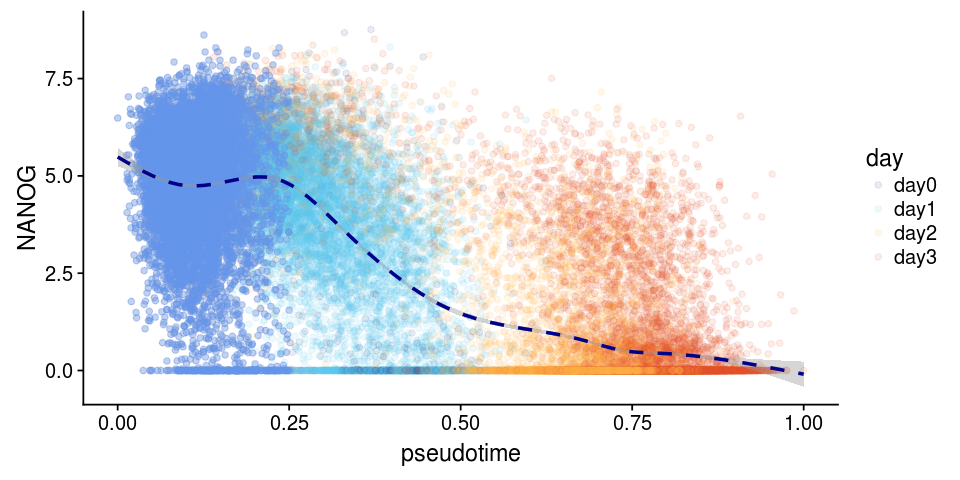

In [69]:
df = cbind(logcounts(sce)["ENSG00000111704_NANOG",],p1)
colnames(df)[1] = "NANOG"
# head(df)
options(repr.plot.width = 8, repr.plot.height = 4) 
ggplot(df, aes(x = pseudotime, y = NANOG, colour = day)) +
        geom_point(alpha = 0.1)  + 
        scale_color_canva(palette = "Pool party") + 
        geom_point(aes(x = pseudotime, y = NANOG), colour = "cornflowerblue",
               data = dplyr::filter(df,  pseudotime < 0.25, day == "day0"),
                  alpha = 0.3) +
        stat_smooth(colour = "darkblue", linetype = 2) 

`geom_smooth()` using method = 'gam'


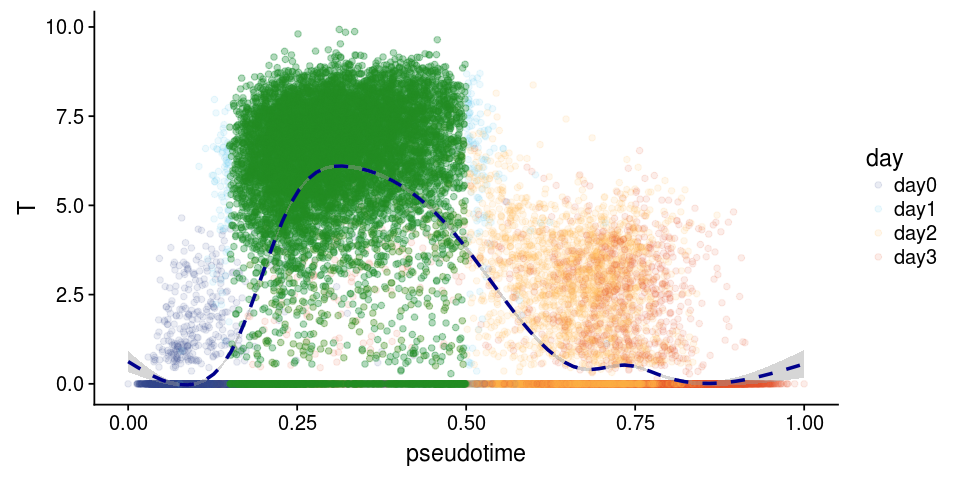

In [70]:
df = cbind(logcounts(sce)["ENSG00000164458_T",],p1)
colnames(df)[1] = "T"
options(repr.plot.width = 8, repr.plot.height = 4) 
ggplot(df, aes(x = pseudotime, y = T, colour = day)) +
        geom_point(alpha = 0.1)  + 
        scale_color_canva(palette = "Pool party") + 
        geom_point(aes(x = pseudotime, y = T), colour = "forestgreen",
               data = dplyr::filter(df, pseudotime > 0.15 & pseudotime < 0.5, day %in% c("day1","day2")),
                  alpha = 0.3) +
        stat_smooth(colour = "darkblue", linetype = 2) 

`geom_smooth()` using method = 'gam'


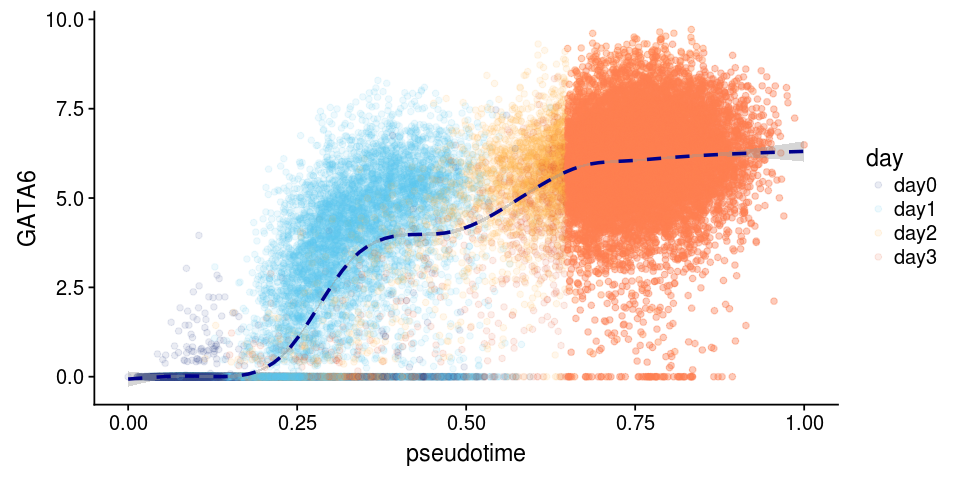

In [71]:
df = cbind(logcounts(sce)["ENSG00000141448_GATA6",],p1)
colnames(df)[1] = "GATA6"
options(repr.plot.width = 8, repr.plot.height = 4) 
ggplot(df, aes(x = pseudotime, y = GATA6, colour = day)) +
        geom_point(alpha = 0.1)  + 
        scale_color_canva(palette = "Pool party") + 
        geom_point(aes(x = pseudotime, y = GATA6), colour = "coral",
               data = dplyr::filter(df, pseudotime >  0.65, day %in% c("day2","day3")),
                  alpha = 0.3) +
        stat_smooth(colour = "darkblue", linetype = 2) 

In [7]:
sce$stage = "not assigned"

In [8]:
sce[,range01(sce$PC1_top500hvgs) < 0.25 & sce$day == "day0"]$stage = "ips"
sce[,range01(sce$PC1_top500hvgs)  > 0.15 & range01(sce$PC1_top500hvgs) < 0.5 & sce$day %in% c("day1","day2")]$stage = "mesendo"
sce[,range01(sce$PC1_top500hvgs)  > 0.65 & sce$day %in% c("day2","day3")]$stage = "defendo"

In [9]:
table(sce$stage)


     defendo          ips      mesendo not assigned 
       13176         9323        10041         3504 

In [17]:
saveRDS(sce, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20181003/sce_filt_stagesPC1top500hvgd.rds")

In [4]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20181003/sce_filt_stagesPC1top500hvgd.rds")

ERROR: Error in readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20181003/sce_filt_stagesPC1top500hvgd.rds"): error reading from connection


In [22]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(122): adj_x adj_y ... PC1_top2000hvgs stage
reducedDimNames(1): PCA
spikeNames(1): ERCC

In [10]:
get_combinations <- function(sceset){
    # day0
    mysce = sceset[,sceset$day == "day0"]
    if (ncol(mysce) == 0){l0 <- c()}
    else {
        mat = table(mysce$donor_short_id, mysce$experiment) 
        ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
        l = c()
        for (i in 1:dim(ord)[1]){l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])}
        l0 = paste0(l,"-day0")
    }
    # day1
    mysce = sceset[,sceset$day == "day1"]
    if (ncol(mysce) == 0){l1 <- c()}
    else {
        mat = table(mysce$donor_short_id, mysce$experiment) 
        ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
        l = c()
        for (i in 1:dim(ord)[1]){l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])}
        l1 = paste0(l,"-day1")
    }
    # day2
    mysce = sceset[,sceset$day == "day2"]
    if (ncol(mysce) == 0){l2 <- c()}
    else {
        mat = table(mysce$donor_short_id, mysce$experiment) 
        ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
        l = c()
        for (i in 1:dim(ord)[1]){l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])}
        l2 = paste0(l,"-day2")
    }
    # day3
    mysce = sceset[,sceset$day == "day3"]
    if (ncol(mysce) == 0){l3 <- c()}
    else {
        mat = table(mysce$donor_short_id, mysce$experiment) 
        ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
        l = c()
        for (i in 1:dim(ord)[1]){l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])}
        l3 = paste0(l,"-day3")
    }
    # combine (aggregation by donor, experiment, day)
    l = c(l0, l1, l2, l3)
    l
}

In [ ]:
mysce = sceset[,sceset$day == "day2"]
    if (ncol(mysce) == 0){l2 <- c()}
    else {
        mat = table(mysce$donor_short_id, mysce$experiment) 
        ord = which(table(mysce$donor_short_id, mysce$experiment) > 0, arr.ind = T)
        l = c()
        for (i in 1:dim(ord)[1]){l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])}
        l2 = paste0(l,"-day2")
    }

In [18]:
get_combinations_morethanNcells <- function(sceset,N){
    # day0
    mysce = sceset[,sceset$day == "day0"]
    if (ncol(mysce) == 0){l0 <- c()}
    else {
        mat = table(mysce$donor_short_id, mysce$experiment) 
        ord = which(table(mysce$donor_short_id, mysce$experiment) > N, arr.ind = T)
        l = c()
        for (i in 1:dim(ord)[1]){l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])}
        l0 = paste0(l,"-day0")
    }
    # day1
    mysce = sceset[,sceset$day == "day1"]
    if (ncol(mysce) == 0){l1 <- c()}
    else {
        mat = table(mysce$donor_short_id, mysce$experiment) 
        ord = which(table(mysce$donor_short_id, mysce$experiment) > 10, arr.ind = T)
#         print (mysce$day)
#         print(ord)
        l = c()
        for (i in 1:dim(ord)[1]){l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])}
        l1 = paste0(l,"-day1")
    }
    # day2
    mysce = sceset[,sceset$day == "day2"]
    if (ncol(mysce) == 0){l2 <- c()}
    else {
        mat = table(mysce$donor_short_id, mysce$experiment) 
        ord = which(table(mysce$donor_short_id, mysce$experiment) > N, arr.ind = T)
#         print (mysce$day)
#         print(ord)
        l = c()
        for (i in 1:dim(ord)[1]){l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])}
        l2 = paste0(l,"-day2")
    }
    # day3
    mysce = sceset[,sceset$day == "day3"]
    if (ncol(mysce) == 0){l3 <- c()}
    else {
        mat = table(mysce$donor_short_id, mysce$experiment) 
        ord = which(table(mysce$donor_short_id, mysce$experiment) > N, arr.ind = T)
#         print (mysce$day)
#         print(ord)
        l = c()
        for (i in 1:dim(ord)[1]){l[i] <- paste0(rownames(mat)[ord[i,1]],"-",colnames(mat)[ord[i,2]])}
        l3 = paste0(l,"-day3")
    }
    # combine (aggregation by donor, experiment, day)
    l = c(l0, l1, l2, l3)
    l
}

In [12]:
get_means_byexpt <- function(sceset, ngenes, l){
    n = length(l)
    means <- matrix(0,nrow = ngenes, ncol = n)
    for (i in 1:n){
        don = gsub("*-.*","",l[i])
        expt = gsub("*-.*","",gsub(".*-e","e",l[i]))
        day = gsub(".*-","",l[i])
        sc <- logcounts(sceset)[,sceset$donor_short_id == don & sceset$experiment == expt & sceset$day == day]
        if (length(sc) == nrow(sceset)) {means[,i] <- sc}
        else {means[,i] <- rowMeans(sc)}
    }
    rownames(means) = rownames(sceset)
    colnames(means) = l
    means
}

In [13]:
make_sample_mapping <- function(pheno, sce){
    df <- data.frame(donor.expt.day = colnames(pheno))
    df$donor = gsub("*-.*","",df$donor.expt.day)
    df$expt = gsub("*-.*","",gsub(".*-e","e",df$donor.expt.day))
    df$day = gsub(".*-","",df$donor.expt.day)
    df1 <- data.frame(donor_long_id = unique(sce$donor_long_id), donor = unique(sce$donor_short_id))
    df2 <- left_join(df, df1, by = "donor")
    # genotype_samples phenotype_samples
    samples = df2[,c(5,1)]
    print(head(samples))
    colnames(samples) = c()
    samples
}

In [14]:
table(sce$stage)


     defendo          ips      mesendo not assigned 
       13176         9323        10041         3504 

In [15]:
output.dir = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/20181003/input_files_PC1top500hvgs_aspseudo/"
mystages = c("ips","mesendo","defendo")
for (i in 1:length(mystages)){
    mystage = mystages[i]
    print(mystage)
    mysce = sce[,sce$stage == mystage]
    l = get_combinations(mysce)
    m = get_means_byexpt(mysce, nrow(mysce), l)
    mean_pcs = prcomp(t(m))$x[,1:10]
    smf = make_sample_mapping(m, mysce)
    phenotype_filename = paste0(output.dir, mystage, ".pheno")
    covariate_filename = paste0(output.dir, mystage, ".covs")
    samplemapping_filename = paste0(output.dir, mystage, ".samples")
    write.table(m, phenotype_filename, sep = "\t", quote = F, col.names = NA)
    write.table(mean_pcs, covariate_filename, sep = "\t", quote = F, col.names = NA)
    write.table(smf, samplemapping_filename, sep = "\t", quote = F, row.names = F, col.names = F)
}

[1] "ips"
     donor_long_id      donor.expt.day
1 HPSI0214i-heth_1 heth_1-expt_12-day0
2 HPSI1013i-jogf_2 jogf_2-expt_12-day0
3 HPSI0214i-pelm_3 pelm_3-expt_12-day0
4 HPSI0114i-vass_1 vass_1-expt_12-day0
5 HPSI0214i-wibj_2 wibj_2-expt_12-day0
6 HPSI0114i-zapk_3 zapk_3-expt_12-day0
[1] "mesendo"
     donor_long_id      donor.expt.day
1 HPSI0314i-fafq_1 fafq_1-expt_09-day1
2 HPSI1013i-hiaf_2 hiaf_2-expt_09-day1
3 HPSI0114i-iisa_3 iisa_3-expt_09-day1
4 HPSI0114i-joxm_1 joxm_1-expt_09-day1
5 HPSI0114i-lexy_1 lexy_1-expt_09-day1
6 HPSI1013i-wuye_2 wuye_2-expt_09-day1
[1] "defendo"
     donor_long_id      donor.expt.day
1 HPSI0614i-dixh_2 dixh_2-expt_21-day2
2 HPSI0215i-fawm_2 fawm_2-expt_21-day2
3 HPSI0614i-koqx_1 koqx_1-expt_21-day2
4 HPSI0414i-naju_1 naju_1-expt_21-day2
5 HPSI0714i-oebj_1 oebj_1-expt_21-day2
6 HPSI0314i-wigw_2 wigw_2-expt_21-day2


In [46]:
output.dir = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/20181003/input_files_PC1top500hvgs_aspseudo_morethan10cells/"
mystages = c("ips","mesendo","defendo")
mystages = c("ips","defendo")
for (i in 1:length(mystages)){
    mystage = mystages[i]
    mysce = sce[,sce$stage == mystage]
    l = get_combinations_morethanNcells(mysce, 10)
    m = get_means_byexpt(mysce, nrow(mysce), l)
    mean_pcs = prcomp(t(m))$x[,1:10]
    smf = make_sample_mapping(m, mysce)
    phenotype_filename = paste0(output.dir, mystage, ".pheno")
    covariate_filename = paste0(output.dir, mystage, ".covs")
    samplemapping_filename = paste0(output.dir, mystage, ".samples")
    write.table(m, phenotype_filename, sep = "\t", quote = F, col.names = NA)
    write.table(mean_pcs, covariate_filename, sep = "\t", quote = F, col.names = NA)
    write.table(smf, samplemapping_filename, sep = "\t", quote = F, row.names = F, col.names = F)
}

     donor_long_id      donor.expt.day
1 HPSI0214i-heth_1 heth_1-expt_12-day0
2 HPSI1013i-jogf_2 jogf_2-expt_12-day0
3 HPSI0214i-pelm_3 pelm_3-expt_12-day0
4 HPSI0114i-vass_1 vass_1-expt_12-day0
5 HPSI0214i-wibj_2 wibj_2-expt_12-day0
6 HPSI0114i-zapk_3 zapk_3-expt_12-day0
     donor_long_id      donor.expt.day
1 HPSI0614i-dixh_2 dixh_2-expt_21-day2
2 HPSI0215i-fawm_2 fawm_2-expt_21-day2
3 HPSI0614i-koqx_1 koqx_1-expt_21-day2
4 HPSI0714i-oebj_1 oebj_1-expt_21-day2
5 HPSI0215i-fawm_2 fawm_2-expt_22-day2
6 HPSI1014i-babz_3 babz_3-expt_24-day2


In [63]:
sce$stage_lambda <- "not assigned"
sce[,sce$princ_curve_scaled01 < 0.2 & sce$day == "day0"]$stage_lambda <- "ips"
sce[,sce$princ_curve_scaled01 > 0.2 & sce$princ_curve_scaled01 < 0.6 & sce$day %in% c("day1","day2")]$stage_lambda <- "mesendo"
sce[,sce$princ_curve_scaled01 > 0.6 & sce$day %in% c("day2","day3")]$stage_lambda <- "defendo"

In [64]:
sce_hvg = sce[rowData(sce)$is_intop500hvg,]
sce_hvg = sce_hvg[,order(sce$princ_curve_scaled01)]
pheno = logcounts(sce_hvg)
pheno[1:5,1:10]

24475_3#219 22607_6#5 25475_7#240 24475_3#190
ENSG00000002330_BAD       2.434960    6.1579053 4.303131    4.772847   
ENSG00000002586_CD99      5.696462    5.8993004 4.716540    5.846745   
ENSG00000003402_CFLAR     3.023744    0.3033378 4.317709    3.941835   
ENSG00000006327_TNFRSF12A 8.065300    7.7567279 6.952651    7.581689   
ENSG00000007520_TSR3      5.165896    5.2065052 5.192990    3.815355   
                          24475_8#22 24352_2#9 24353_6#369 22607_6#115
ENSG00000002330_BAD       5.069190   6.5704165 7.402923    4.9264895  
ENSG00000002586_CD99      4.241846   5.3168213 6.213468    4.6074437  
ENSG00000003402_CFLAR     1.894960   0.7008997 4.154143    0.2138526  
ENSG00000006327_TNFRSF12A 7.075725   8.2265172 7.903543    7.0147232  
ENSG00000007520_TSR3      4.605750   4.4378069 4.557571    6.0364038  
                          25476_4#315 24352_2#216
ENSG00000002330_BAD       4.334921    5.365680   
ENSG00000002586_CD99      3.941152    5.340443   
ENSG00000003402_CFLAR     2.376547    2.100461   
ENSG00000006327_TNFRSF12A 6.421117    7.549975   
ENSG00000007520_TSR3      4.455474    0.000000

In [ ]:
mat = as.data.frame(cbind(sce_hvg$day, t(logcounts(sce_hvg))))
colnames(mat)[1] <- "day"
design <- model.matrix(~ 0 + day, data = mat)
colnames(design) = paste0("day",0:3)
design = cbind(1,design)
colnames(design)[1] = "Intercept"
dim(design)
head(design)

In [ ]:
matnum <- matrix(as.numeric(unlist(mat[,-1])), nrow = nrow(mat), ncol = ncol(mat)-1)
rownames(matnum) <- rownames(mat)
colnames(matnum) <- colnames(mat)[-1]
dim(t(matnum))

In [ ]:
mylm_0 = lmFit(t(matnum), design[,c("Intercept","day0")])
fit_0 <- eBayes(mylm_0, trend = TRUE)
df_fit_0 = as.data.frame(fit_0$coefficients)
genes_day0 = rownames(head(df_fit_0[order(abs(df_fit_0$day0), decreasing = T),],50))

mylm_1 = lmFit(t(matnum), design[,c("Intercept","day1")])
fit_1 <- eBayes(mylm_1, trend = TRUE)
df_fit_1 = as.data.frame(fit_1$coefficients)
genes_day1 = rownames(head(df_fit_1[order(abs(df_fit_1$day1), decreasing = T),],50))

mylm_2 = lmFit(t(matnum), design[,c("Intercept","day2")])
fit_2 <- eBayes(mylm_2, trend = TRUE)
df_fit_2 = as.data.frame(fit_2$coefficients)
genes_day2 = rownames(head(df_fit_2[order(abs(df_fit_2$day2), decreasing = T),],50))

mylm_3 = lmFit(t(matnum), design[,c("Intercept","day3")])
fit_3 <- eBayes(mylm_3, trend = TRUE)
df_fit_3 = as.data.frame(fit_3$coefficients)
genes_day3 = rownames(head(df_fit_3[order(abs(df_fit_3$day3), decreasing = T),],50))

genes_days = c(genes_day0, genes_day1, genes_day2, genes_day3)

In [65]:
mat = as.data.frame(cbind(sce_hvg$stage_lambda, t(logcounts(sce_hvg))))
colnames(mat)[1] <- "stage"
mat = mat[mat$stage %in% c("ips","mesendo","defendo"),]
#head(mat)
design <- model.matrix(~ 0 + stage, data = mat)
colnames(design) = c("ips","mesendo","defendo")
design = cbind(1,design)
colnames(design)[1] = "Intercept"
dim(design)
# head(design)

[1] 34684     4

In [66]:
matnum <- matrix(as.numeric(unlist(mat[,-1])), nrow = nrow(mat), ncol = ncol(mat)-1)
rownames(matnum) <- rownames(mat)
colnames(matnum) <- colnames(mat)[-1]
dim(t(matnum))

[1]   500 34684

In [67]:
mylm_ips = lmFit(t(matnum), design[,c("Intercept","ips")])
fit_ips <- eBayes(mylm_ips, trend = TRUE)
df_fit_ips = as.data.frame(fit_ips$coefficients)
genes_ips = rownames(head(df_fit_ips[order(abs(df_fit_ips$ips), decreasing = T),],50))

mylm_me = lmFit(t(matnum), design[,c("Intercept","mesendo")])
fit_me <- eBayes(mylm_me, trend = TRUE)
df_fit_me = as.data.frame(fit_me$coefficients)
genes_mesendo = rownames(head(df_fit_me[order(abs(df_fit_me$mesendo), decreasing = T),],50))

mylm_de = lmFit(t(matnum), design[,c("Intercept","defendo")])
fit_de <- eBayes(mylm_de, trend = TRUE)
df_fit_de = as.data.frame(fit_de$coefficients)
genes_defendo = rownames(head(df_fit_de[order(abs(df_fit_de$defendo), decreasing = T),],50))

genes_stages = c(genes_ips, genes_mesendo, genes_defendo)

In [68]:
genes_stages

[1] "ENSG00000147869_CER1"     "ENSG00000095596_CYP26A1" 
  [3] "ENSG00000158815_FGF17"    "ENSG00000164292_RHOBTB3" 
  [5] "ENSG00000183569_SERHL2"   "ENSG00000026025_VIM"     
  [7] "ENSG00000132130_LHX1"     "ENSG00000239713_APOBEC3G"
  [9] "ENSG00000250361_GYPB"     "ENSG00000145423_SFRP2"   
 [11] "ENSG00000141448_GATA6"    "ENSG00000164736_SOX17"   
 [13] "ENSG00000125462_C1orf61"  "ENSG00000155275_TRMT44"  
 [15] "ENSG00000106631_MYL7"     "ENSG00000120937_NPPB"    
 [17] "ENSG00000181885_CLDN7"    "ENSG00000175906_ARL4D"   
 [19] "ENSG00000110148_CCKBR"    "ENSG00000090530_LEPREL1" 
 [21] "ENSG00000113356_POLR3G"   "ENSG00000164946_FREM1"   
 [23] "ENSG00000136110_LECT1"    "ENSG00000003402_CFLAR"   
 [25] "ENSG00000087008_ACOX3"    "ENSG00000100906_NFKBIA"  
 [27] "ENSG00000171617_ENC1"     "ENSG00000154096_THY1"    
 [29] "ENSG00000182798_MAGEB17"  "ENSG00000158560_DYNC1I1" 
 [31] "ENSG00000204262_COL5A2"   "ENSG00000161638_ITGA5"   
 [33] "ENSG00000111704_NANOG"    "ENSG00000165588_OTX2"    
 [35] "ENSG00000255319_ENPP7P8"  "ENSG00000119888_EPCAM"   
 [37] "ENSG00000167600_CYP2S1"   "ENSG00000163032_VSNL1"   
 [39] "ENSG00000166347_CYB5A"    "ENSG00000136014_USP44"   
 [41] "ENSG00000121578_B4GALT4"  "ENSG00000130182_ZSCAN10" 
 [43] "ENSG00000106538_RARRES2"  "ENSG00000010278_CD9"     
 [45] "ENSG00000174640_SLCO2A1"  "ENSG00000092068_SLC7A8"  
 [47] "ENSG00000163508_EOMES"    "ENSG00000120885_CLU"     
 [49] "ENSG00000133937_GSC"      "ENSG00000187193_MT1X"    
 [51] "ENSG00000147869_CER1"     "ENSG00000185155_MIXL1"   
 [53] "ENSG00000158815_FGF17"    "ENSG00000163508_EOMES"   
 [55] "ENSG00000095596_CYP26A1"  "ENSG00000163032_VSNL1"   
 [57] "ENSG00000104371_DKK4"     "ENSG00000141448_GATA6"   
 [59] "ENSG00000136014_USP44"    "ENSG00000136110_LECT1"   
 [61] "ENSG00000113356_POLR3G"   "ENSG00000133937_GSC"     
 [63] "ENSG00000116729_WLS"      "ENSG00000164292_RHOBTB3" 
 [65] "ENSG00000154096_THY1"     "ENSG00000255319_ENPP7P8" 
 [67] "ENSG00000148926_ADM"      "ENSG00000170542_SERPINB9"
 [69] "ENSG00000090530_LEPREL1"  "ENSG00000132130_LHX1"    
 [71] "ENSG00000125462_C1orf61"  "ENSG00000167600_CYP2S1"  
 [73] "ENSG00000170558_CDH2"     "ENSG00000204711_C9orf135"
 [75] "ENSG00000182866_LCK"      "ENSG00000187193_MT1X"    
 [77] "ENSG00000169071_ROR2"     "ENSG00000141934_PPAP2C"  
 [79] "ENSG00000162493_PDPN"     "ENSG00000131203_IDO1"    
 [81] "ENSG00000158246_FAM46B"   "ENSG00000135919_SERPINE2"
 [83] "ENSG00000164093_PITX2"    "ENSG00000179046_TRIML2"  
 [85] "ENSG00000239713_APOBEC3G" "ENSG00000026025_VIM"     
 [87] "ENSG00000106538_RARRES2"  "ENSG00000156574_NODAL"   
 [89] "ENSG00000183569_SERHL2"   "ENSG00000171617_ENC1"    
 [91] "ENSG00000162496_DHRS3"    "ENSG00000147601_TERF1"   
 [93] "ENSG00000145423_SFRP2"    "ENSG00000120885_CLU"     
 [95] "ENSG00000161638_ITGA5"    "ENSG00000130182_ZSCAN10" 
 [97] "ENSG00000099284_H2AFY2"   "ENSG00000175906_ARL4D"   
 [99] "ENSG00000112759_SLC29A1"  "ENSG00000077009_NMRK2"   
[101] "ENSG00000164458_T"        "ENSG00000185155_MIXL1"   
[103] "ENSG00000128683_GAD1"     "ENSG00000204335_SP5"     
[105] "ENSG00000156574_NODAL"    "ENSG00000095596_CYP26A1" 
[107] "ENSG00000107984_DKK1"     "ENSG00000110148_CCKBR"   
[109] "ENSG00000115738_ID2"      "ENSG00000183569_SERHL2"  
[111] "ENSG00000106038_EVX1"     "ENSG00000164292_RHOBTB3" 
[113] "ENSG00000170955_PRKCDBP"  "ENSG00000149557_FEZ1"    
[115] "ENSG00000159167_STC1"     "ENSG00000026025_VIM"     
[117] "ENSG00000250361_GYPB"     "ENSG00000158815_FGF17"   
[119] "ENSG00000106631_MYL7"     "ENSG00000239713_APOBEC3G"
[121] "ENSG00000164736_SOX17"    "ENSG00000120937_NPPB"    
[123] "ENSG00000173401_GLIPR1L1" "ENSG00000155275_TRMT44"  
[125] "ENSG00000181885_CLDN7"    "ENSG00000003402_CFLAR"   
[127] "ENSG00000145423_SFRP2"    "ENSG00000180730_SHISA2"  
[129] "ENSG00000121578_B4GALT4"  "ENSG00000134363_FST"     
[131] "ENSG00000164946_FREM1"    "ENSG00000132130_LHX1"    
[133] "ENSG00000125968_ID1"      "ENSG0000

In [69]:
pluri_markers <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1", 
                   "ENSG00000164362_TERT", "ENSG00000181449_SOX2",
                   "ENSG00000121570_DPPA4")
mesendo_markers <- c("ENSG00000164458_T", "ENSG00000163508_EOMES",
                     "ENSG00000185155_MIXL1")
defendo_markers <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                     "ENSG00000141448_GATA6", "ENSG00000125798_FOXA2",
                     "ENSG00000164736_SOX17", "ENSG00000133937_GSC",
                     "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
later_markers <- c("ENSG00000152804_HHEX", "ENSG00000170608_FOXA3")
diff_genes <- c(pluri_markers, mesendo_markers, defendo_markers, later_markers)

In [36]:
# pca.500hvgs.diff = prcomp(t(logcounts(sce[rowData(sce)$is_intop500hvg | rownames(sce) %in% c(diff_genes,genes_stages),])))
pca.1000hvgs.diff = prcomp(t(logcounts(sce[rowData(sce)$is_intop1000hvg | rownames(sce) %in% c(diff_genes,genes_stages),])))
pca.2000hvgs.diff = prcomp(t(logcounts(sce[rowData(sce)$is_intop2000hvg | rownames(sce) %in% c(diff_genes,genes_stages),])))

In [34]:
plot_pca_day <- function(pca.set, sce){
    df = as.data.frame(pca.set$x[,1:2])
    df = cbind(df, data.frame(day = sce$day))
    perc_var <- round(summary(pca.set)$importance[2,]*100, 1)
    p = ggplot(df, aes(x = as.numeric(PC1), y = as.numeric(PC2), colour = as.factor(day)))
    p = p + geom_point(alpha = 0.2, size = 0.8) 
    p = p + scale_color_canva(palette = "Pool party") 
    p = p + theme_bw() + theme(legend.position = "none", panel.border = element_blank())
    p = p + xlab(paste0("PC1, ",perc_var[1],"% variance explained")) 
    p = p + ylab(paste0("PC2, ",perc_var[2],"% variance explained"))
    p
}

In [47]:
pca.diff = prcomp(t(logcounts(sce[rownames(sce) %in% c(diff_genes,genes_stages),])))

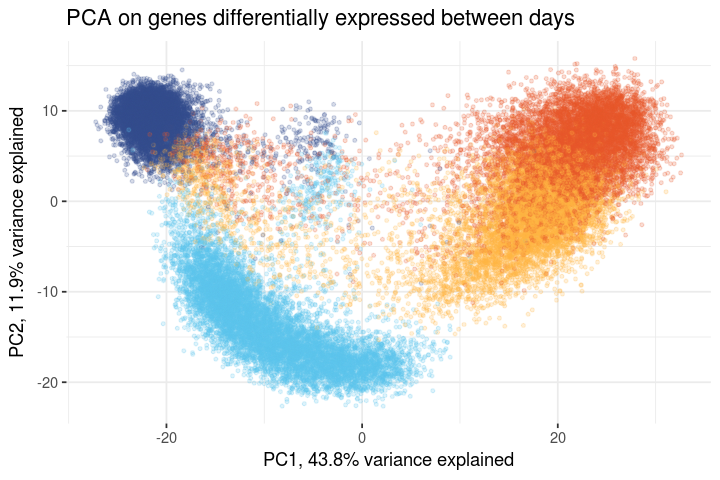

In [51]:
options(repr.plot.width = 6, repr.plot.height = 4)
p = plot_pca_day(pca.diff, sce[rownames(sce) %in% c(diff_genes,genes_stages),]) 
p + ggtitle("PCA on genes differentially expressed between days")

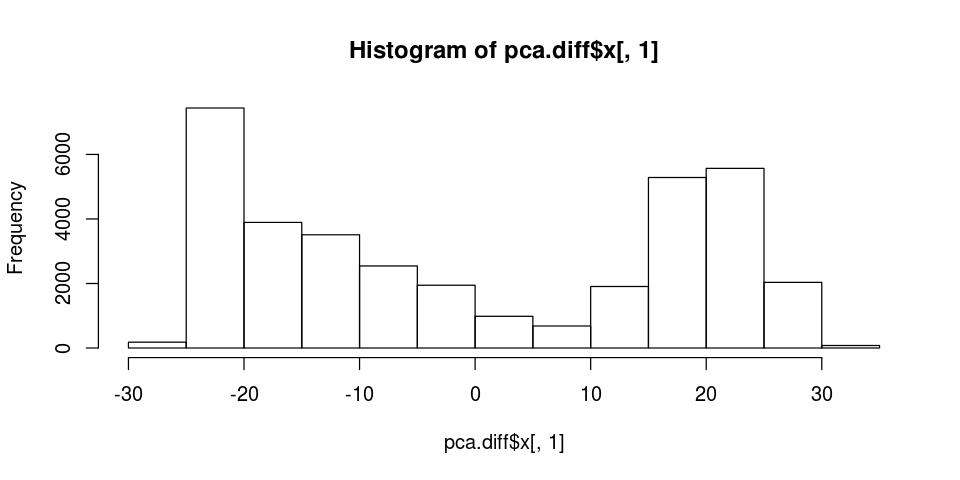

In [49]:
hist(pca.diff$x[,1])

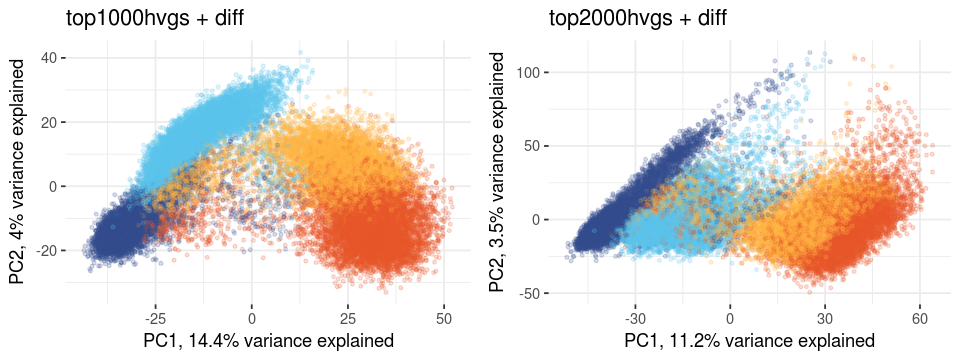

In [38]:
p1 = plot_pca_day(pca.1000hvgs.diff, sce[rowData(sce)$is_intop1000hvg | rownames(sce) %in% c(diff_genes,genes_stages),]) + ggtitle("top1000hvgs + diff")
p2 = plot_pca_day(pca.2000hvgs.diff, sce[rowData(sce)$is_intop2000hvg | rownames(sce) %in% c(diff_genes,genes_stages),]) + ggtitle("top2000hvgs + diff")
options(repr.plot.width = 8, repr.plot.height = 3)
plot_grid(p1, p2, ncol = 2)

In [43]:
pca.1000hvgs.diff = prcomp(t(logcounts(sce[rowData(sce)$is_intop1000hvg | rownames(sce) %in% c(diff_genes,genes_days),])))
pca.2000hvgs.diff = prcomp(t(logcounts(sce[rowData(sce)$is_intop2000hvg | rownames(sce) %in% c(diff_genes,genes_days),])))

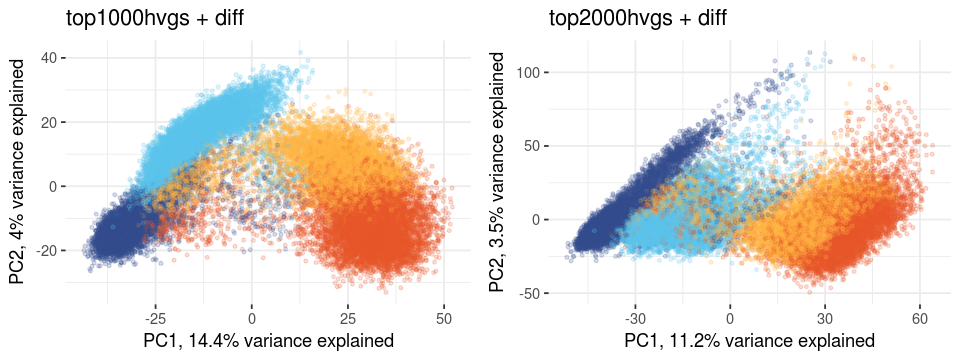

In [45]:
p1 = plot_pca_day(pca.1000hvgs.diff, sce[rowData(sce)$is_intop1000hvg | rownames(sce) %in% c(diff_genes,genes_days),]) + ggtitle("top1000hvgs + diff")
p2 = plot_pca_day(pca.2000hvgs.diff, sce[rowData(sce)$is_intop2000hvg | rownames(sce) %in% c(diff_genes,genes_days),]) + ggtitle("top2000hvgs + diff")
options(repr.plot.width = 8, repr.plot.height = 3)
plot_grid(p1, p2, ncol = 2)

In [ ]:
sce_hvg

In [55]:
pca.500hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_intop500hvg,])))

In [57]:
library(princurve)
princ.curve = principal.curve(x = pca.500hvgs$x[,1:2])

In [58]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}
sce$princ_curve_scaled01 <- range01(princ.curve$lambda)

In [70]:
mat = pheno[rownames(pheno) %in% unique(genes_stages),]
mat_scaled = t(apply(mat, 1, scale))

In [81]:
genes_sel = c('NANOG','T','GATA6','CXCR4','EOMES','NODAL','SOX17','LHX1','CER1','MIXL1','ID2','UBE2L6',
             'ADM','MT1X','IDO1','RAMP2','POU5F1')
genes_sel = c('NANOG','T','GATA6')
subset = which(gsub(".*_","",rownames(mat)) %in% genes_sel)
labels = gsub(".*_","",rownames(mat)[subset])

In [82]:
labels

[1] "NANOG" "GATA6" "T"

In [72]:
ha_column = HeatmapAnnotation(df = data.frame(day = sce_hvg$day, # annotation 1
                                              stage = sce_hvg$stage_lambda, # annotation 2
                                             pseudotime = range01(sce_hvg$princ_curve_scaled01)), # annotation 3
    gap = unit(c(1.5, 1.5), "mm"),
    col = list(day = c("day0" =  "#344d90", "day1" = "#5cc5ef", "day2" = "#ffb745", "day3" = "#e7552c"), # col anno1
               stage = c("ips" = "cornflowerblue", "mesendo" = "forestgreen", "defendo" = "coral",
                        "not assigned" = "grey"), # col anno2
               pseudotime = colorRamp2(c(0,1), c("white", "darkblue")))) # col anno3

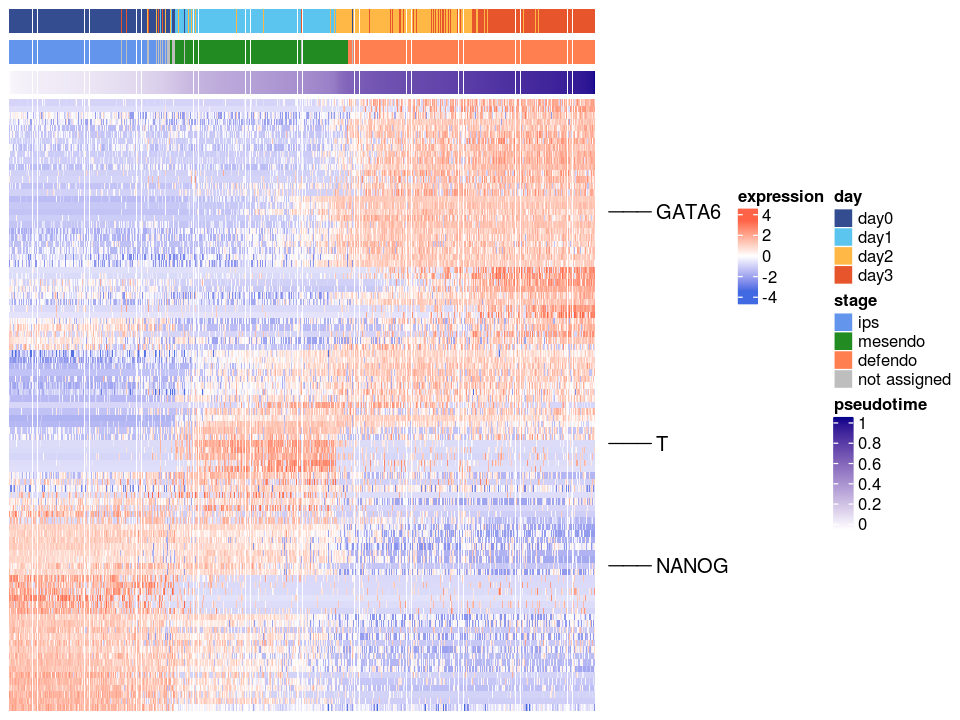

In [84]:
options(repr.plot.width = 8, repr.plot.height = 6)
Heatmap(mat_scaled,  show_column_names = FALSE, show_row_names = FALSE, show_row_dend = FALSE,
        name = "expression", 
        col = colorRamp2(c(-3, 0, 3), c("royalblue", "white", "tomato")),
        top_annotation = ha_column,
        cluster_columns = FALSE) + 
rowAnnotation(link = row_anno_link(at = subset, labels = labels),
  width = unit(1, "cm") + max_text_width(labels))